<a href="https://colab.research.google.com/github/shamabansal17/Case-studies/blob/main/NetflixShama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

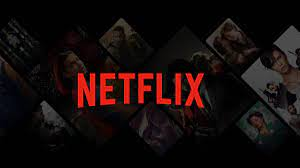  

# **NETFLIX CASE STUDY**          
Analyzed by Shama Bansal

https://colab.research.google.com/drive/1dMF39sBHXJPJaamyDwAIkZ386U-4VDgu?usp=drive_link                        
google drive link to this notebook

# *Netflix is one of the world's leading entertainment services with over 247 million paid memberships in over 190 countries enjoying TV series, films across a wide variety of genres and languages.*

In [ ]:
# @title Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# @title Uploading File

!gdown 1aDRcprQZq9ZkDVRdR2EWNPCRcws--oeo


Downloading...
From: https://drive.google.com/uc?id=1aDRcprQZq9ZkDVRdR2EWNPCRcws--oeo
To: /content/netflix.csv
100% 3.40M/3.40M [00:00<00:00, 179MB/s]


![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSYEeCUzxWAG7Z2MyQvccgEPWOPd2jU_A_BQQ&usqp=CAU)

In [ ]:
# @title Reading Data
df=pd.read_csv('netflix.csv')
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# @title
df.tail(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


### **Understanding the data**



In [ ]:
# @title Lets have a look at the data to know when and what type of content to be added and produced to the netflix in near future, what directors and actors to be worked with which will ensure the growth of netflix business
print(f"This data set has {df.shape[0]} data points and {df.shape[1]} columns\n\n")
print(df.info())

This data set has 8807 data points and 12 columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [ ]:
# @title Finding duplicate rows
df[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


No duplicate rows are there in the dataframe

# *Converting Datatype*

In [ ]:
# @title We can see there are 11 columns which are non numeric out of which show_id , title , description are unique while others are categorial and only one column which is numeric but can be seen as categorial too, is release year. Though the date_added column has object data type lets convert it into datetime datatype to have better insights.
df['date_added']=pd.to_datetime(df['date_added'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [ ]:
# @title  Statistical summary of only numeric cum categorial data release year
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


# *Checking NaN values*


In [ ]:
# @title How many null values in dataframe??
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
# @title Percentage of null values for each field
df.isnull().sum()/ df.shape[0]*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

# *Dropping rows*

In [ ]:
# @title Lets first deal with the NaN values before unnesting the columns to remove unneccessary expansion of data in different ways,as out of total 8807 rows, the missing value rows for date_added, rating and duration is very less (10,4,3 in number), which is less than even 0.1% and thus, not much important in the data so we can afford to drop them
netflix_df=df.dropna(subset=['date_added', 'rating','duration'])       # i have created a new dataframe instead of dropping columns from original dataframa
print(netflix_df.isnull().sum())
print(f"The data points left in the dataframe is {netflix_df.shape[0]}  and columns are same as before {netflix_df.shape[1]}")

show_id            0
type               0
title              0
director        2621
cast             825
country          829
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64
The data points left in the dataframe is 8790  and columns are same as before 12


# *Finding repetitive Pairs*

In [ ]:
# @title As for country,cast and director column the null values are approx 10%,its difficult to tackle..lets find out if there is any famous pair of cast and director most commonly used to get values to fill in these NaN elements
dir_cst=netflix_df.groupby(['director','cast'])['director','cast'].value_counts().sort_values(ascending=False).head(11).reset_index()  # atleast 3 times same pair is considered only
dir_c_c=netflix_df.groupby(['director','cast','country'])['director','cast','country'].value_counts().sort_values(ascending=False).head(4).reset_index()  # atleast 3 times same pair is considered only
dir_cnt=netflix_df.groupby(['director','country'])['director','country'].value_counts().sort_values(ascending=False).head(68).reset_index()   # atleast 5 times same pair is considered only
cst_cnt=netflix_df.groupby(['cast','country'])['cast','country'].value_counts().sort_values(ascending=False).head(35).reset_index() # atleast 5 times same pair is considered only
print(f"\t\t\t famous director and casts pair \n{dir_cst.head(5)} \n\n")
print(f"\t\t\t famous director,country and casts pair\n { dir_c_c.head(5)}\n\n")
print(f"\t\t\t famous director and country and pair \n{ dir_cnt.head(5)}\n\n")
print(f"\t\t\t famous country and casts pair\n{ cst_cnt.head(5)}\n\n")

			 famous director and casts pair 
              director                                               cast   0
0        Rajiv Chilaka  Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...  12
1  Rathindran R Prasad  Aishwarya Rajesh, Vidhu, Surya Ganapathy, Madh...   4
2       S.S. Rajamouli  Prabhas, Rana Daggubati, Anushka Shetty, Taman...   4
3            Jay Karas                                          Bill Burr   3
4          Stan Lathan                                     Dave Chappelle   3 


			 famous director,country and casts pair
            director              cast         country  0
0         Jay Karas         Bill Burr   United States  3
1  Edward Cotterill  Rachael Stirling  United Kingdom  3
2       Stan Lathan    Dave Chappelle   United States  3
3  Walter C. Miller       Sam Kinison   United States  3


			 famous director and country and pair 
              director        country   0
0         Marcus Raboy  United States  15
1            Jay Karas  United State

# *Getting NaN values data only*

In [ ]:
# @title Custom function for filling cast columnn based on famous pair
def fill_cast(df):
  mode_val=df['cast'].mode().iloc[0] if not df['cast'].mode().empty else None
  if pd.notna(mode_val):
    df['cast']=df['cast'].fillna(mode_val)
  return df

In [ ]:
# @title Custom function for filling country columnn based on famous pair
def fill_cntry(df):
  mode_val=df['country'].mode().iloc[0] if not df['country'].mode().empty else None
  if pd.notna(mode_val):
    df['country']=df['country'].fillna(mode_val)
  return df

In [ ]:
# @title Custom function for filling director columnn based on famous pair
def fill_dir(df):
  mode_val=df['director'].mode().iloc[0]  if not df['director'].mode().empty else None
  if pd.notna(mode_val):
    df['director']=df['director'].fillna(mode_val)
  return df


In [ ]:
# @title Let us now get the null values data points in a different dataframe to fill them based on above found pairs of cast,country and directors
nf_null=netflix_df[netflix_df.isnull().any(axis=1)]
fam_dir=nf_null[(nf_null['director'].isin(dir_cst['director'])) | (nf_null['director'].isin(dir_c_c['director'])) |(nf_null['director'].isin(dir_cnt['director']))]
nf_null1=netflix_df[netflix_df['director'].isin(fam_dir['director'])]            # collecting all directors who have some repeted pairs and getting all data about them from whole df

# *Filling Nan values with same pair values*

In [ ]:
# @title applying custom function to fill cast and country Nan based on director pair with them

nf_null1=nf_null1.groupby('director',group_keys=False).apply(fill_cntry)
nf_null1=nf_null1.groupby('director',group_keys=False).apply(fill_cast)
nf_null1=nf_null1[['title','director','cast','country']]
merged_df = pd.merge(netflix_df, nf_null1, on='title', how='outer', suffixes=('', '_filled'))        # merging new found values to original df
merged_df['country']=merged_df['country'].fillna(merged_df['country_filled'])                         # filling nan values with found commom
merged_df['cast']=merged_df['cast'].fillna(merged_df['cast_filled'])
merged_df.drop(columns=['director_filled','cast_filled','country_filled'],inplace=True)                  # dropping the columns which are used now
print(f"\t\tthe remaining NaN values are \n{merged_df.isnull().sum()}")

		the remaining NaN values are 
show_id            0
type               0
title              0
director        2621
cast             818
country          795
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64


In [ ]:
# @title applying custom function to fill director and country Nan based on casts pair with them
new_null=merged_df[merged_df.isnull().any(axis=1)]
fam_cast=new_null[(new_null['cast'].isin(dir_cst['cast'])) | (new_null['cast'].isin(dir_c_c['cast'])) |(new_null['cast'].isin(cst_cnt['cast']))]
new_null1=merged_df[merged_df['cast'].isin(fam_cast['cast'])]
new_null1=new_null1.groupby('cast',group_keys=False).apply(fill_dir)
new_null1=new_null1.groupby('cast',group_keys=False).apply(fill_cntry)
new_null1=new_null1[['title','director','cast','country']]
merged_df = pd.merge(merged_df, new_null1, on='title', how='outer', suffixes=('', '_filled'))
merged_df['country']=merged_df['country'].fillna(merged_df['country_filled'])
merged_df['director']=merged_df['director'].fillna(merged_df['director_filled'])
merged_df.drop(columns=['director_filled','cast_filled','country_filled'],inplace=True)
print(f"\t\tthe remaining NaN values are \n{merged_df.isnull().sum()}")

		the remaining NaN values are 
show_id            0
type               0
title              0
director        2586
cast             818
country          791
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64


In [ ]:
# @title applying custom function to fill director and casts Nan based on country pair with them
nfl_null=merged_df[merged_df.isnull().any(axis=1)]
fam_cntry=nfl_null[(nfl_null['country'].isin(dir_cnt['country'])) | (nfl_null['country'].isin(dir_c_c['country'])) |(nfl_null['country'].isin(cst_cnt['country']))]
nfl_null1=merged_df[merged_df['country'].isin(fam_cntry['country'])]
nfl_null2=nfl_null1.groupby(['country','cast'],group_keys=False).apply(fill_dir)       # due to group by on country and cast.. the rows having cast as nan is left out
nfl_null3=nfl_null1.groupby(['country','director'],group_keys=False).apply(fill_cast)    # due to group by on country and director.. the rows having director as nan is left out
nfl_null2=nfl_null2[['title','director','cast','country']]
nfl_null3=nfl_null3[['title','director','cast','country']]
merged_df1 = pd.merge(merged_df, nfl_null2, on='title', how='outer', suffixes=('', '_filled'))
merged_df1['director']=merged_df1['director'].fillna(merged_df1['director_filled'])
merged_df2= pd.merge(merged_df1, nfl_null3, on='title', how='outer', suffixes=('', '_filled1'))
merged_df2['cast']=merged_df2['cast'].fillna(merged_df2['cast_filled1'])
merged_df2.drop(columns=['director_filled','cast_filled','country_filled','director_filled1','cast_filled1','country_filled1'],inplace=True)
merged_df2.isnull().sum()

show_id            0
type               0
title              0
director        2576
cast             780
country          791
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

 #*Filling the remaining NaN values*

In [ ]:
# @title Even after taking so many modal values only some 100 of elements got filled. So now lets filled the remaining elements with unknown as we cant afford to leave that much data ,the NaN values lIst are all 0 now
netflix=merged_df.fillna({'country':'unknown_country',
                   'director': 'unknown_dir',
                   'cast':'unknown_cast'})
netflix.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# *Unnesting the columns data*

In [ ]:
# @title As we can see that there are columns having multiple records in single element so lets now unnest these columns to get clear picture of data and have proper insights
netflix['cast']=netflix['cast'].str.split(',')
netflix=netflix.explode('cast',ignore_index=True)
netflix['cast']=netflix['cast'].str.strip()                           # to remove trailing and leading spaces
netflix['country']=netflix['country'].str.split(',')
netflix=netflix.explode('country',ignore_index=True)
netflix['country'].replace({"":'unknown_country'},inplace=True)
netflix['country']=netflix['country'].str.strip()                     # to replace "" names in country column
netflix['listed_in']=netflix['listed_in'].str.split(',')
netflix=netflix.explode('listed_in',ignore_index=True)
netflix['listed_in']=netflix['listed_in'].str.strip()
netflix['director']=netflix['director'].str.split(',')
netflix=netflix.explode('director',ignore_index=True)
netflix['director']=netflix['director'].str.strip()
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201972 entries, 0 to 201971
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       201972 non-null  object        
 1   type          201972 non-null  object        
 2   title         201972 non-null  object        
 3   director      201972 non-null  object        
 4   cast          201972 non-null  object        
 5   country       201972 non-null  object        
 6   date_added    201972 non-null  datetime64[ns]
 7   release_year  201972 non-null  int64         
 8   rating        201972 non-null  object        
 9   duration      201972 non-null  object        
 10  listed_in     201972 non-null  object        
 11  description   201972 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 18.5+ MB


#              ***Data is cleaned and Unnested***


# *df is the original data ,netflix_df is the data with some nan rows dropped, merged_df3 is the nested data with mode values fill,netflix is clean unnested data nan*              
                We may need them during different stages as diiferent insights needs the analysis easy using required dataframes


![](https://www.stechies.com/userfiles/images/Visualization.jpg)

# *Visual and Non Graphical Analysis*

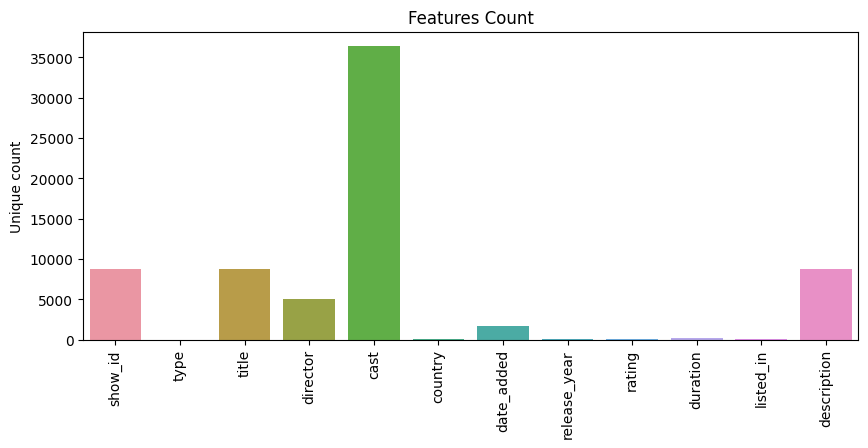

In [ ]:
# @title Unique values of each column
plt.figure(figsize=(10,4))
sns.barplot(x=netflix.nunique().index,y=netflix.nunique())
plt.xticks(rotation=90)
plt.title("Features Count")
plt.ylabel("Column Name")
plt.ylabel("Unique count")
plt.show()

In [ ]:
# @title
print(f'Column Names and their unique values\n\n{netflix.nunique()}\n\n\n\nColumn Name and their data type\n\n{netflix.dtypes}')

Column Names and their unique values

show_id          8790
type                2
title            8790
director         4992
cast            36393
country           123
date_added       1713
release_year       74
rating             14
duration          220
listed_in          42
description      8758
dtype: int64



Column Name and their data type

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object


# *Insights*

- We can see that the column show_id and title have all the unique values and object datatype so they can be treated as primary key but they can be taken as category.
- date_added is in date format while in release year only the year is given and not the dates.
-the count of cast is high.
-there are 14 kinds of rating according to which content can be divided.
-the netflix business is expanded upto 123 countries when the data is produced
-Description column also has almost all unique text data.



# *Analyzing each column separately*

In [ ]:
# @title  SHOW_ID
print(f"Netflix has {df.show_id.nunique()} show_id on its platform out of which we are taking into consideration {netflix_df.show_id.nunique()} only.\n")
print(netflix.groupby('show_id',group_keys=False)['show_id'].nunique())

Netflix has 8807 show_id on its platform out of which we are taking into consideration 8790 only.

show_id
s1       1
s10      1
s100     1
s1000    1
s1001    1
        ..
s995     1
s996     1
s997     1
s998     1
s999     1
Name: show_id, Length: 8790, dtype: int64


In [ ]:
# @title TYPE
netflix_type=netflix.groupby('type',group_keys=False)['title'].nunique().sort_values().reset_index()
print(netflix_type)
print(f"There are 2 categories of type\nTV Shows are {netflix_type.iloc[0,1]}  and Movies are {netflix_type.iloc[1,1]} in number")

      type  title
0  TV Show   2664
1    Movie   6126
There are 2 categories of type
TV Shows are 2664  and Movies are 6126 in number


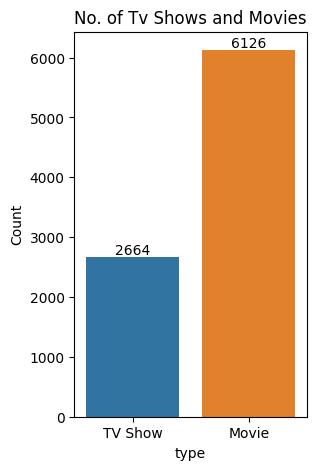

In [ ]:
# @title
plt.figure(figsize=(3,5))
ax=sns.barplot(data=netflix_type,x='type',y='title')
ax.bar_label(ax.containers[0])
plt.title("No. of Tv Shows and Movies")
plt.ylabel("Type of Content")
plt.ylabel("Count")
plt.show()

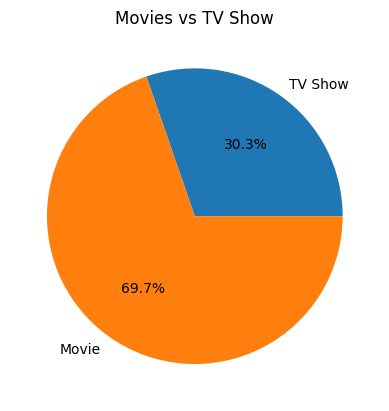

In [ ]:
# @title
plt.pie(netflix_type['title'],labels=netflix_type['type'],autopct='%1.1f%%')
plt.title('Movies vs TV Show')
plt.show()

TV Shows are approx. 30 % of Movies available on Netflix

In [ ]:
# @title TITLE
print(f"Netflix has {df.title.nunique()} unique Title name on its platform out of which we are taking into consideration {netflix_df.title.nunique()} only.\n")
print(netflix.groupby('title',group_keys=False)['show_id'].nunique())

Netflix has 8807 unique Title name on its platform out of which we are taking into consideration 8790 only.

title
#Alive                           1
#AnneFrank - Parallel Stories    1
#FriendButMarried                1
#FriendButMarried 2              1
#Roxy                            1
                                ..
忍者ハットリくん                         1
海的儿子                             1
마녀사냥                             1
반드시 잡는다                          1
최강전사 미니특공대 : 영웅의 탄생              1
Name: show_id, Length: 8790, dtype: int64


All titles and show_id are unique so no benefit of plotting it on a **graph**


In [ ]:
# @title DIRECTOR
print(f"There are {netflix['director'].nunique()} directors who directed the Netflix Movies\n")
netflix.groupby('director',group_keys=False)['title'].nunique().sort_values(ascending=False)

There are 4992 directors who directed the Netflix Movies



director
unknown_dir                2586
Rajiv Chilaka                23
Jan Suter                    21
Alastair Fothergill          19
Raúl Campos                  19
                           ... 
Juan Antin                    1
Juan Antonio de la Riva       1
Juan Camilo Pinzon            1
Juan Carlos Medina            1
Ayush Raina                   1
Name: title, Length: 4992, dtype: int64

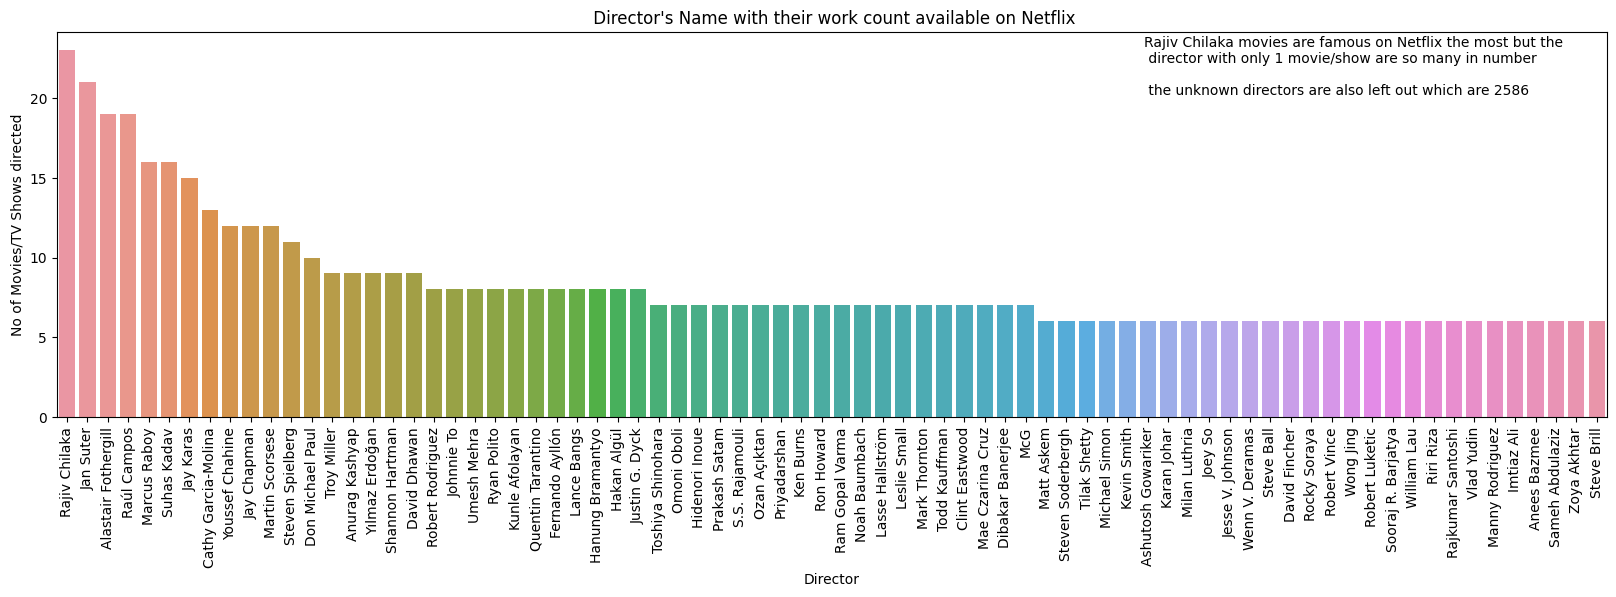

In [ ]:
# @title It is not insightable to plot that much directors on graph so plotting only those who directed more than 5
direct_cnt=netflix.groupby('director',group_keys=False)['title'].nunique().sort_values(ascending=False).reset_index()
direct_cnt.rename(columns={'director':'Director',
                           'title':'No of Movies/TV Shows directed'},inplace=True)
direct_cnt=direct_cnt[(direct_cnt['No of Movies/TV Shows directed']>5) & (direct_cnt['Director']!='unknown_dir')]
plt.figure(figsize=(20,5))
ax=sns.barplot(data=direct_cnt,x='Director',y='No of Movies/TV Shows directed')
plt.xticks(rotation=90)
plt.title(" Director's Name with their work count available on Netflix")
plt.text(52.8,20.2,"Rajiv Chilaka movies are famous on Netflix the most but the\n director with only 1 movie/show are so many in number \n\n the unknown directors are also left out which are 2586")
plt.show()



In [ ]:
# @title CAST
print(f"There are {netflix['cast'].nunique()} Actors who acted in Netflix Movies/TV Shows\n")
cast_count=netflix.groupby('cast')['title'].nunique().sort_values(ascending=False).reset_index()
cast_count=cast_count.rename(columns={'cast':'Actor',
                                      'title': 'Count of Movies/Shows'})
print(cast_count)

There are 36393 Actors who acted in Netflix Movies/TV Shows

                   Actor  Count of Movies/Shows
0           unknown_cast                    818
1            Anupam Kher                     43
2          Julie Tejwani                     35
3         Shah Rukh Khan                     35
4           Rupa Bhimani                     33
...                  ...                    ...
36388  Jamie Renée Smith                      1
36389       Jamie Moreen                      1
36390       Jamie Michie                      1
36391  Jamie Martin Mann                      1
36392       Ṣọpẹ́ Dìrísù                      1

[36393 rows x 2 columns]


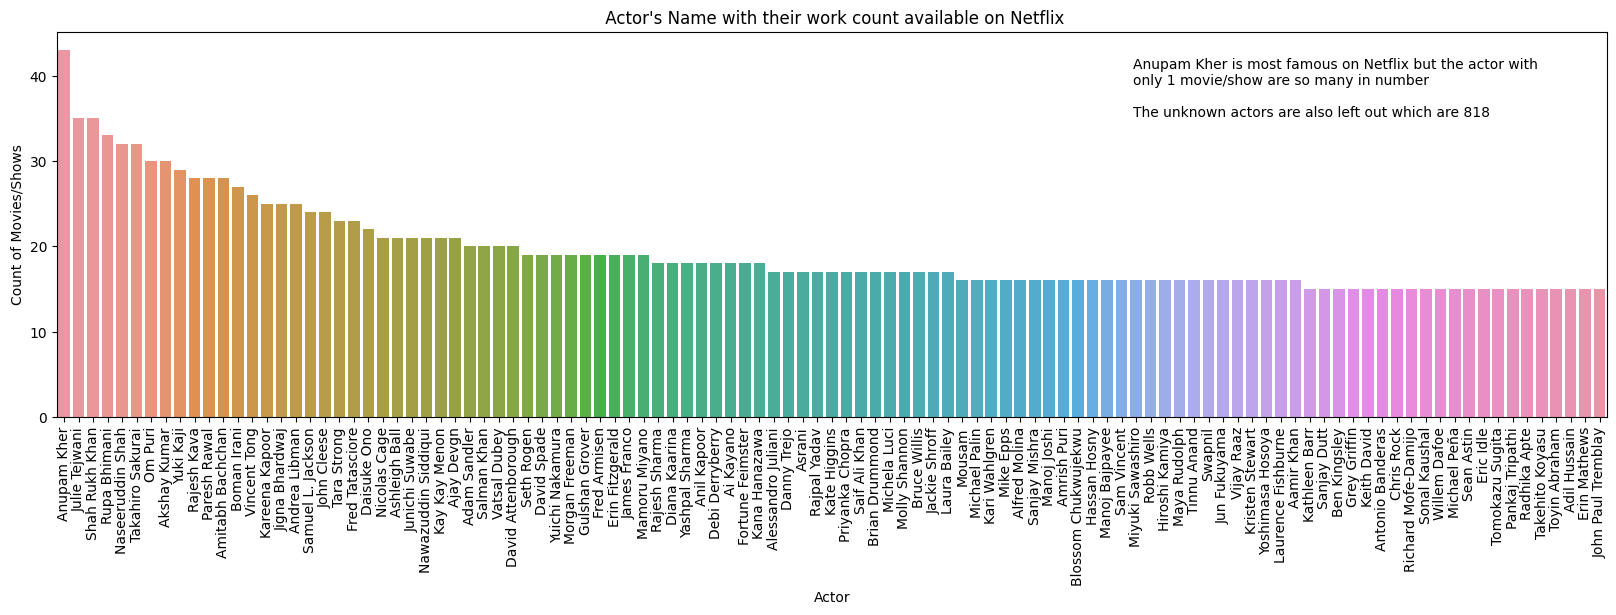

In [ ]:
# @title It is not insightable to plot that much actors on graph so plotting only those who acted in more than 14.
cast_count=cast_count[(cast_count['Count of Movies/Shows']>=15) & (cast_count['Actor']!='unknown_cast')]
plt.figure(figsize=(20,5))
ax=sns.barplot(data=cast_count,x='Actor',y='Count of Movies/Shows')
plt.title(" Actor's Name with their work count available on Netflix")
plt.text(73.8,35.2,"Anupam Kher is most famous on Netflix but the actor with \nonly 1 movie/show are so many in number \n\nThe unknown actors are also left out which are 818")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# @title COUNTRY
print(f"The Movies/TV Shows were produced in {netflix['country'].nunique()} countries.\n")
country_count=netflix.groupby('country')['title'].nunique().sort_values(ascending=False).reset_index()
country_count=country_count.rename(columns={'title': 'Count of Movies/Shows'})
country_count

The Movies/TV Shows were produced in 123 countries.



,country,Count of Movies/Shows
0,United States,3686
1,India,1073
2,United Kingdom,805
3,unknown_country,798
4,Canada,446
...,...,...
118,Nicaragua,1
119,Palestine,1
120,Panama,1
121,Paraguay,1


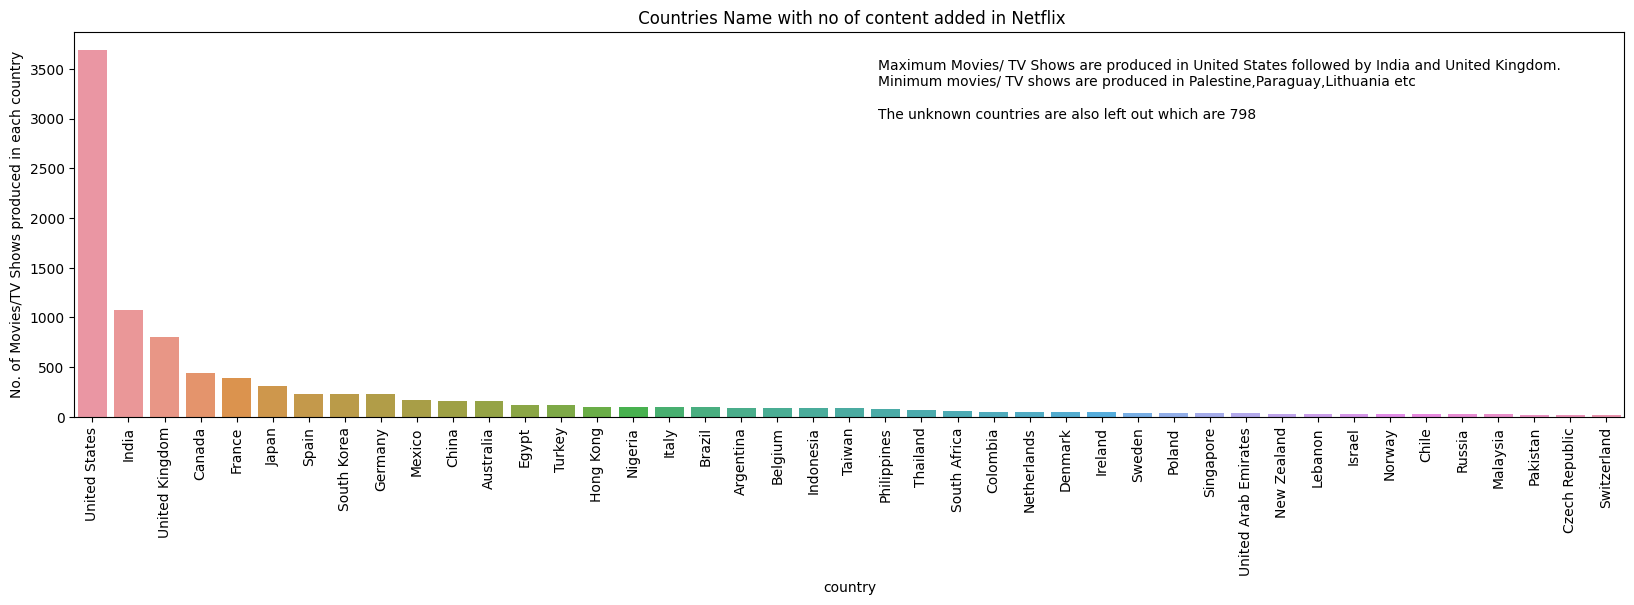

In [ ]:
# @title It is not insightable to plot that much countries on graph so plotting only those whose count is more than 14.
country_count=country_count[(country_count['Count of Movies/Shows']>=15) & (country_count['country']!='unknown_country')]
plt.figure(figsize=(20,5))
sns.barplot(data=country_count,x='country',y='Count of Movies/Shows')
plt.title(" Countries Name with no of content added in Netflix")
plt.text(21.8,3000.2,"Maximum Movies/ TV Shows are produced in United States followed by India and United Kingdom.\nMinimum movies/ TV shows are produced in Palestine,Paraguay,Lithuania etc  \n\nThe unknown countries are also left out which are 798")
plt.xticks(rotation=90)
plt.ylabel("No. of Movies/TV Shows produced in each country")
plt.show()

In [ ]:
# @title DATE ADDED
nfx_date=netflix.groupby('date_added')['title'].nunique().reset_index()
print(nfx_date)
print(f"\n\nThe content was first added on {nfx_date.iloc[0,0]} and the recent one on {nfx_date.iloc[-1,0]}(have data upto that date only)")


     date_added  title
0    2008-01-01      1
1    2008-02-04      1
2    2009-05-05      1
3    2009-11-18      1
4    2010-11-01      1
...         ...    ...
1708 2021-09-21      5
1709 2021-09-22      9
1710 2021-09-23      2
1711 2021-09-24     10
1712 2021-09-25      1

[1713 rows x 2 columns]


The content was first added on 2008-01-01 00:00:00 and the recent one on 2021-09-25 00:00:00(have data upto that date only)


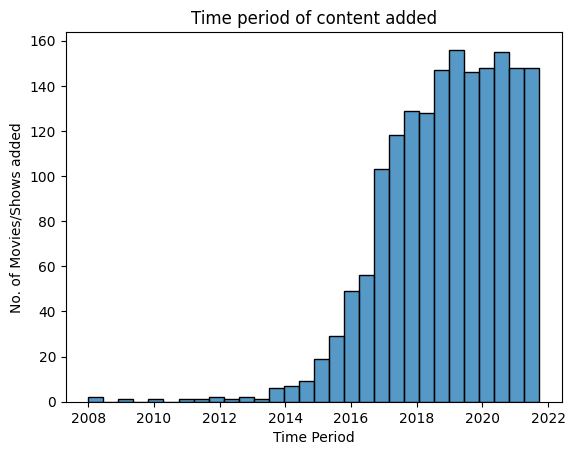

In [ ]:
# @title
sns.histplot(data=nfx_date,x='date_added')
plt.title("Time period of content added")
plt.ylabel("No. of Movies/Shows added")
plt.xlabel("Time Period")
plt.show()

# *We can see the Netflix started its business in 2008 till recently, the content is added the most in 2018,2020 last but this is declined recently*

In [ ]:
# @title RELEASE YEAR
print(netflix_df['release_year'].value_counts())
print(f"\n\nThe year on which  the movie/shows added on netflix are released more is {netflix_df['release_year'].value_counts().index[0]} followed by {netflix_df['release_year'].value_counts().index[1]}")

2018    1146
2017    1030
2019    1030
2020     953
2016     901
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64


The year on which  the movie/shows added on netflix are released more is 2018 followed by 2017


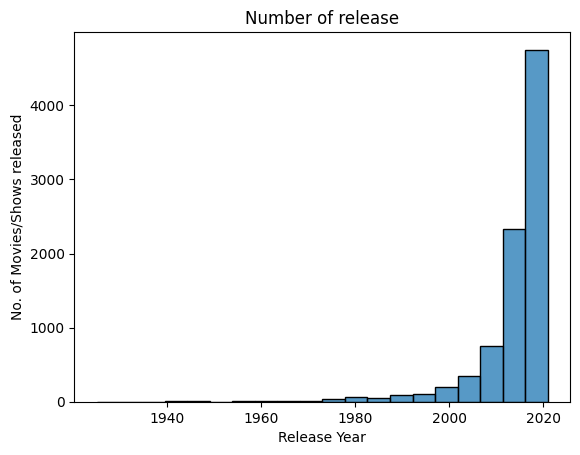

In [ ]:
# @title
sns.histplot(data=netflix_df,x='release_year',bins=20)
plt.ylabel("No. of Movies/Shows released")
plt.title("Number of release")
plt.xlabel("Release Year")
plt.show()

In [ ]:
# @title RATINGS
netflix_df['rating'].value_counts()


TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

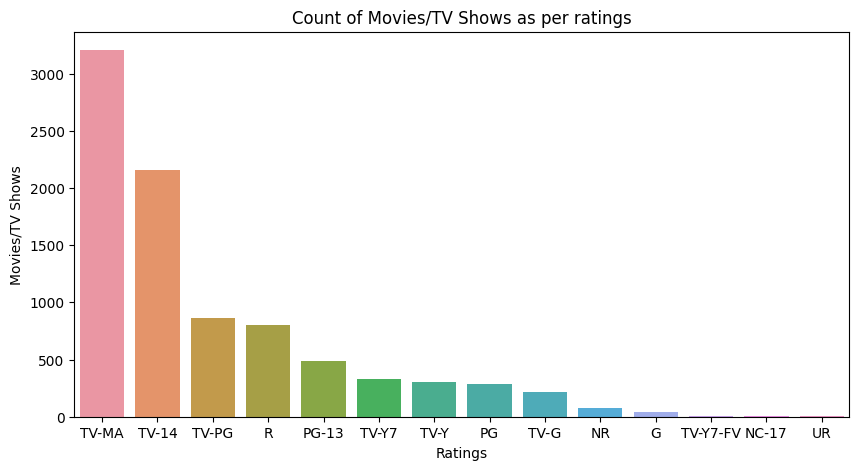

In [ ]:
# @title
plt.figure(figsize=(10,5))
sns.countplot(data=netflix_df,x='rating',order=['TV-MA', 'TV-14', 'TV-PG', 'R', 'PG-13', 'TV-Y7', 'TV-Y', 'PG', 'TV-G','NR', 'G', 'TV-Y7-FV', 'NC-17', 'UR'])
plt.title("Count of Movies/TV Shows as per ratings")
plt.ylabel("Movies/TV Shows")
plt.xlabel("Ratings")
plt.show()

TV_MA(mature audience content) is the most added content on netflix followed by TV-14,TV-PG while the least added content is NC-17 and UR

In [ ]:
# @title DURATION
df['duration'].value_counts()

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: duration, Length: 220, dtype: int64

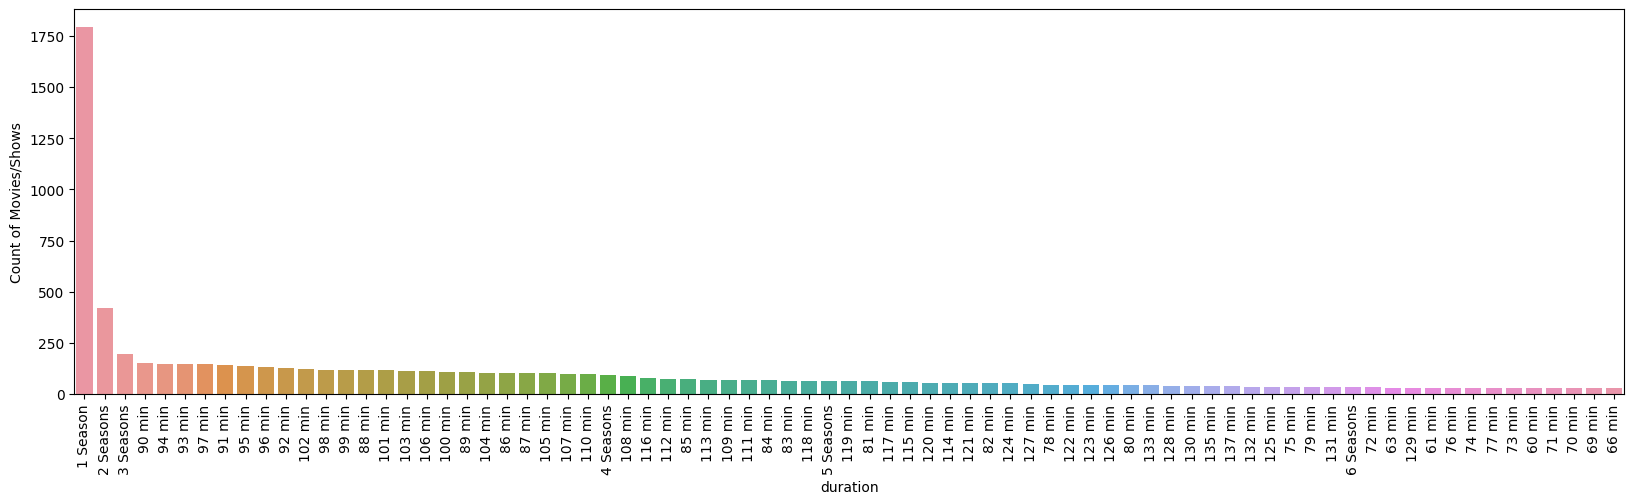

In [ ]:
# @title It is not insightable to plot 200 duration on graph so plotting only those whose count is more than 25.
duration_count=netflix.groupby('duration')['title'].nunique().sort_values(ascending=False).reset_index()
duration_count=duration_count.rename(columns={'title': 'Count of Movies/Shows'})
duration_count=duration_count[(duration_count['Count of Movies/Shows']>25)]
duration_count
plt.figure(figsize=(20,5))
sns.barplot(data=duration_count,x='duration',y='Count of Movies/Shows')
plt.xticks(rotation=90)
plt.show()

TV shows with 1 season are added the most while more the number of seassons they are added less, same goes for th emovies the longer movies are lesser in  number that average 90-95 min movies

In [ ]:
# @title LISTED IN
genre_count=netflix.groupby('listed_in')['title'].nunique().sort_values(ascending=False).reset_index()
genre_count=genre_count.rename(columns={'title':'Count'})
genre_count.head(5)


,listed_in,Count
0,International Movies,2752
1,Dramas,2426
2,Comedies,1674
3,International TV Shows,1349
4,Documentaries,869


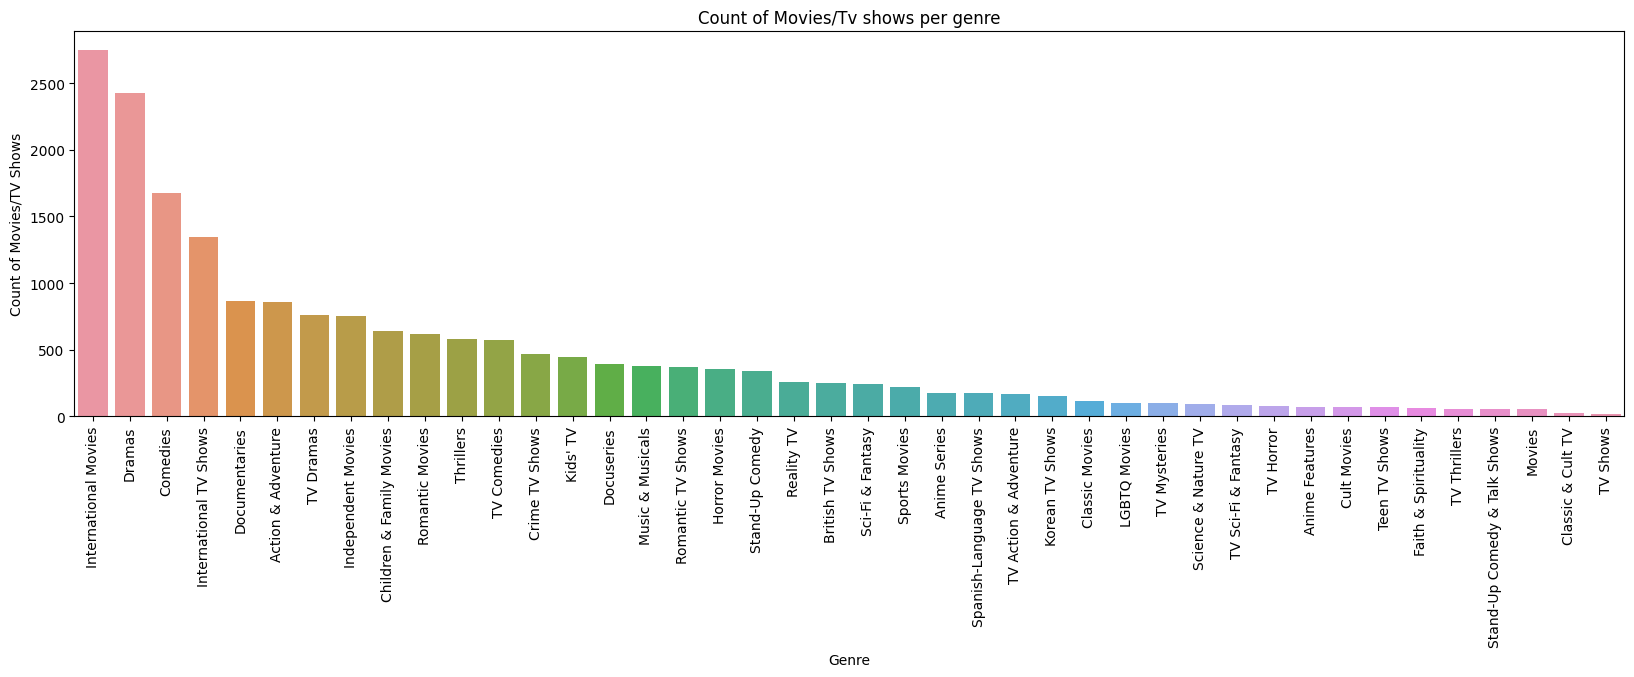

In [ ]:
# @title
plt.figure(figsize=(20,5))
sns.barplot(data=genre_count,x='listed_in',y='Count')
plt.xticks(rotation=90)
plt.xlabel("Genre")
plt.ylabel("Count of Movies/TV Shows")
plt.title("Count of Movies/Tv shows per genre")
plt.show()


In [ ]:
# @title DESCRIPTION
netflix_df['description'].value_counts().sort_values(ascending=False)


Paranormal activity at a lush, abandoned property alarms a group eager to redevelop the site, but the eerie events may not be as unearthly as they think.    4
Challenged to compose 100 songs before he can marry the girl he loves, a tortured but passionate singer-songwriter embarks on a poignant musical journey.    3
A surly septuagenarian gets another chance at her 20s after having her photo snapped at a studio that magically takes 50 years off her life.                 3
Multiple women report their husbands as missing but when it appears they are looking for the same man, a police officer traces their cryptic connection.     3
Born into a small town controlled by the mafia, an irate young woman seeks revenge on the forces that tore apart and wrongfully imprisoned her family.       2
                                                                                                                                                            ..
Strong-willed, middle-class Kashaf and carefre

Description is not a categorial variable and also almost unique for most of the records except for some so it is again not possible to plot them on the graph as 8758 unique data points.

# **Movies vs TV Shows Analysis**

In [ ]:
# @title Segregating data of Movies and TV Shows
netflix_movie=netflix[netflix['type']=='Movie']
netflix_show=netflix[netflix['type']=='TV Show']


In [ ]:
# @title Top 10 Movies producing Country
movie_country1=netflix_movie.groupby('country')['title'].nunique().sort_values(ascending=False).reset_index()
movie_country=movie_country1[movie_country1['country']!='unknown_country'].head(10)
movie_country.rename(columns={'title':'No. of Movies Produced'},inplace=True)
print(f"Showing unknown country in top 10 countries doesnt makes sense to me as this can be different \nor same or other combinations, so filtered these data points where country is unknown\n\n\n{movie_country}")


Showing unknown country in top 10 countries doesnt makes sense to me as this can be different 
or same or other combinations, so filtered these data points where country is unknown


           country  No. of Movies Produced
0    United States                    2753
1            India                     989
2   United Kingdom                     534
4           Canada                     320
5           France                     303
6          Germany                     182
7            Spain                     171
8            Japan                     119
9            China                     114
10          Mexico                     111


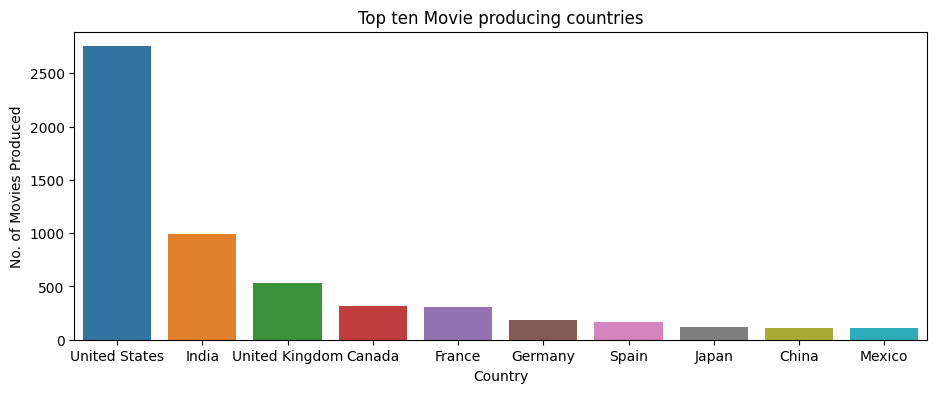

In [ ]:
# @title
plt.figure(figsize=(11,4))
sns.barplot(data=movie_country,x='country',y='No. of Movies Produced')
plt.title("Top ten Movie producing countries")
plt.xlabel("Country")
plt.show()

The maximum movies of Netflix are produced in United States followed by India and United Kingdom

In [ ]:
# @title Top 10 TV Shows producing Country
show_country1=netflix_show.groupby('country')['title'].nunique().sort_values(ascending=False).reset_index()
show_country=show_country1[show_country1['country']!='unknown_country'].head(10)
show_country.rename(columns={'title':'No. of TV Shows Produced'},inplace=True)
print(f"Showing unknown country in top 10 countries doesnt makes sense to me as this can be different \nor same or other combinations, so just filtered these data points where country is unknown\n\n\n{show_country}")


Showing unknown country in top 10 countries doesnt makes sense to me as this can be different 
or same or other combinations, so just filtered these data points where country is unknown


           country  No. of TV Shows Produced
0    United States                       933
2   United Kingdom                       271
3            Japan                       197
4      South Korea                       170
5           Canada                       126
6           France                        90
7            India                        84
8           Taiwan                        70
9        Australia                        64
10           Spain                        61


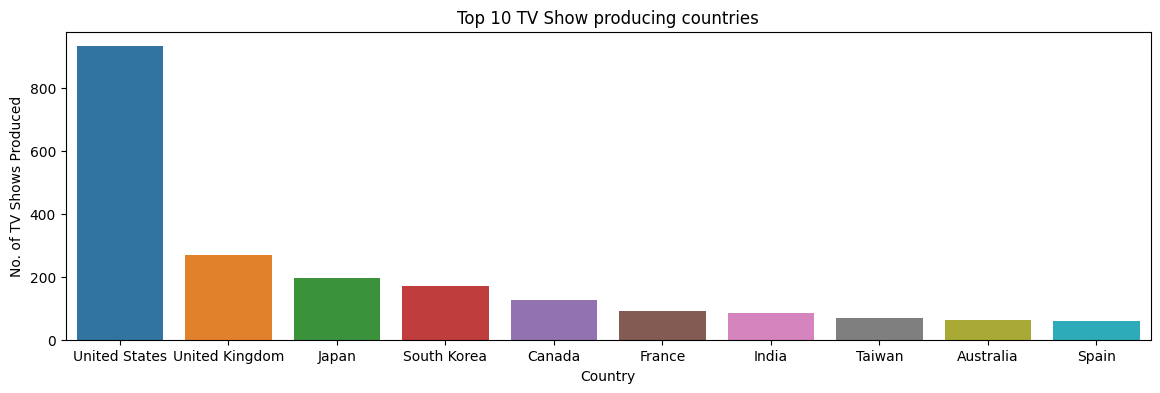

In [ ]:
# @title
plt.figure(figsize=(14,4))
sns.barplot(data=show_country,x='country',y='No. of TV Shows Produced')
plt.title("Top 10 TV Show producing countries")
plt.xlabel("Country")
plt.show()

The most Tv Show producing country is United States again followed by United Kingdom and Japan

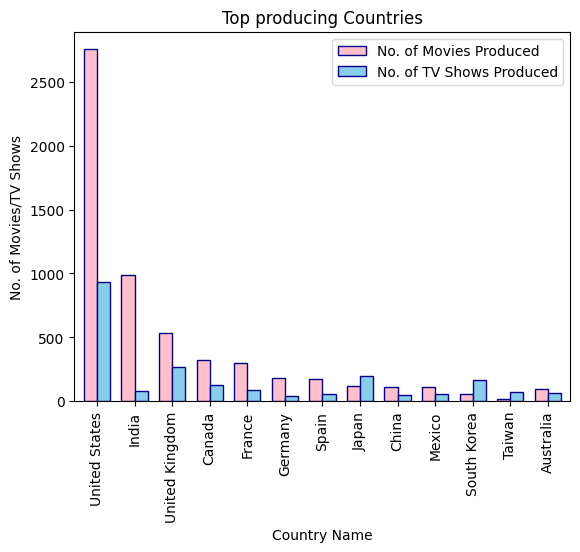

In [ ]:
# @title Top Countries together for both TV shows and Movies
mve_shw=movie_country.merge(show_country,on='country',how='outer')
mve_shw1=mve_shw.merge(show_country1,on='country',how='left')
mve_shw2=mve_shw1.merge(movie_country1,on='country',how='left')
mve_shw2['No. of Movies Produced'].fillna(mve_shw2['title_y'],inplace=True)
mve_shw2['No. of TV Shows Produced'].fillna(mve_shw2['title_x'],inplace=True)
mve_shw2.drop(['title_y','title_x'],axis=1,inplace=True)
mve_shw2['No. of TV Shows Produced']=mve_shw2['No. of TV Shows Produced'].astype(int)
mve_shw2['No. of Movies Produced']=mve_shw2['No. of Movies Produced'].astype(int)
ax=mve_shw2.plot(kind='bar',stacked=False,width=.7,color=['pink','skyblue'],edgecolor='darkblue')
ax.set_xticklabels(mve_shw2['country'])
plt.title('Top producing Countries')
plt.xlabel("Country Name")
plt.ylabel('No. of Movies/TV Shows')
plt.show()

- USA toppes for both movies and TV shows
- India is ahead in producing movies but for TV shows it is much behind
- Japan who is ahead in TV show production is much behind for movie production
- United Kingdom is good in both

# **Best time to launch a TV Show/Movie**

In [ ]:
# @title Creating week and month columns
netflix_movie['week_added']=netflix_movie['date_added'].dt.week
netflix_movie['month_added']=netflix_movie['date_added'].dt.month
netflix_movie['year_added']=netflix_movie['date_added'].dt.year
netflix_show['week_added']=netflix_show['date_added'].dt.week
netflix_show['month_added']=netflix_show['date_added'].dt.month
netflix_show['year_added']=netflix_show['date_added'].dt.year
netflix_df['week_added']=netflix_df['date_added'].dt.week
netflix_df['month_added']=netflix_df['date_added'].dt.month

In [ ]:
# @title Movies added per week
movie_per_week=netflix_movie.groupby('week_added')['title'].nunique().reset_index()
movie_per_week.rename(columns={'title':'No of movies added',
                               'week_added':'Week'},inplace=True)
movie_per_week.head(5)


,Week,No of movies added
0,1,316
1,2,78
2,3,81
3,4,55
4,5,135


In [ ]:
# @title TV Shows added per week
show_per_week=netflix_show.groupby('week_added')['title'].nunique().reset_index()
show_per_week.rename(columns={'title':'No of TV Shows added',
                               'week_added':'Week'},inplace=True)
show_per_week.head(5)

,Week,No of TV Shows added
0,1,56
1,2,30
2,3,32
3,4,32
4,5,72


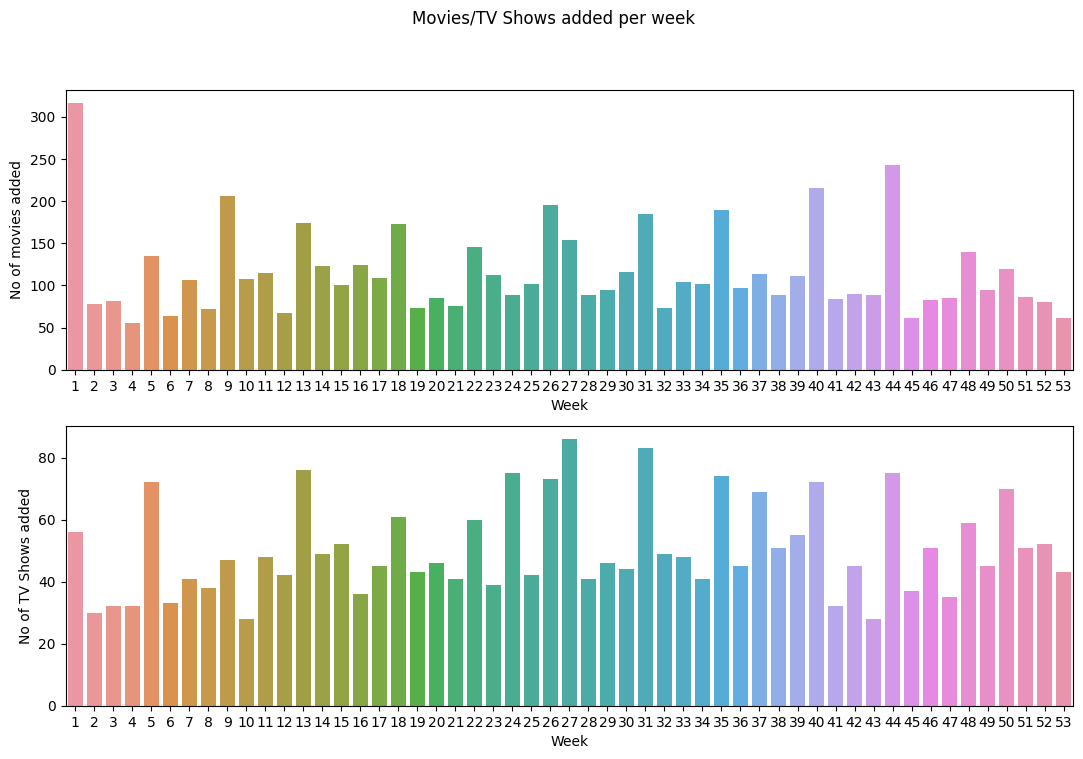

In [ ]:
# @title
plt.figure(figsize=(13,8))
plt.suptitle('Movies/TV Shows added per week')
plt.subplot(2,1,1)
sns.barplot(movie_per_week,x='Week',y='No of movies added')

plt.subplot(2,1,2)
sns.barplot(show_per_week,x='Week',y='No of TV Shows added')

plt.show()


- The movie are added mostly in 1st week and almost more in the last week of month
- The TV Shows are mostly added on the the same weeks as movies but in last week the distribution differs and TV shows are added more in some last weeks too but the weeks when maximum TV Shows are added is weeks of mid year time period

In [ ]:
# @title Movies added per month
movie_per_month=netflix_movie.groupby('month_added')['title'].nunique().reset_index()
movie_per_month.rename(columns={'title':'No of Movies added',
                               'month_added':'Month'},inplace=True)
movie_per_month

,Month,No of Movies added
0,1,545
1,2,382
2,3,528
3,4,549
4,5,439
5,6,492
6,7,565
7,8,518
8,9,518
9,10,545


In [ ]:
# @title TV Shows added per month
show_per_month=netflix_show.groupby('month_added')['title'].nunique().reset_index()
show_per_month.rename(columns={'title':'No of TV Shows added',
                               'month_added':'Month'},inplace=True)
show_per_month


,Month,No of TV Shows added
0,1,192
1,2,180
2,3,213
3,4,214
4,5,193
5,6,236
6,7,262
7,8,236
8,9,251
9,10,215


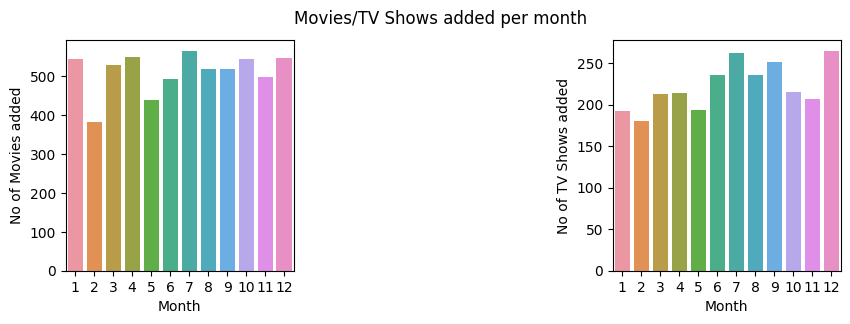

In [ ]:
# @title
plt.figure(figsize=(10,3))
plt.suptitle("Movies/TV Shows added per month")
plt.subplot(1,3,1)
sns.barplot(movie_per_month,x='Month',y='No of Movies added')

plt.subplot(1,3,3)
sns.barplot(show_per_month,x='Month',y='No of TV Shows added')
plt.show()

- Movies are added the most in July followed by April month
while the least in February month
- TV Shows are added the most in December month follwed byJuly and the least in same February month

# *Analysis of Actors/directors*

In [ ]:
# @title Top 10 movie directors
famous_mv_dir=netflix_movie.groupby('director')['title'].nunique().sort_values(ascending=False).reset_index()
famous_mv_dir.rename(columns={'title':'No of Movies directed',
                               'director':"Director's Name"},inplace=True)

famous_mv_dir=famous_mv_dir[famous_mv_dir["Director's Name"]!="unknown_dir"].head(10)
famous_mv_dir

,Director's Name,No of Movies directed
1,Rajiv Chilaka,22
2,Jan Suter,21
3,Raúl Campos,19
4,Suhas Kadav,16
5,Marcus Raboy,15
6,Jay Karas,15
7,Cathy Garcia-Molina,13
8,Youssef Chahine,12
9,Martin Scorsese,12
10,Jay Chapman,12


In [ ]:
# @title Top 10 TV Show directors
famous_show_dir=netflix_show.groupby('director')['title'].nunique().sort_values(ascending=False).reset_index()
famous_show_dir.rename(columns={'title':'No of TV Shows directed',
                               'director':"Director's Name"},inplace=True)

famous_show_dir=famous_show_dir[famous_show_dir["Director's Name"]!="unknown_dir"].head(10)
famous_show_dir

,Director's Name,No of TV Shows directed
1,Alastair Fothergill,14
2,Ken Burns,5
3,Stan Lathan,3
4,Christopher Loren Ewers,2
5,Joe Berlinger,2
6,Iginio Straffi,2
7,Meghan O'Hara,2
8,Rob Seidenglanz,2
9,Jung-ah Im,2
10,Lynn Novick,2


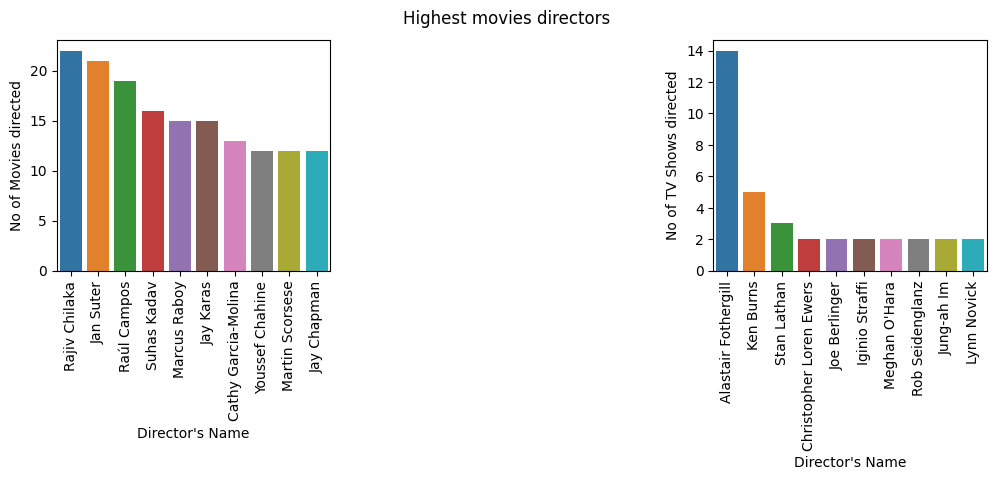

In [ ]:
# @title
plt.figure(figsize=(12,3))
plt.suptitle("Highest movies directors")

plt.subplot(1,3,1)
sns.barplot(famous_mv_dir,x="Director's Name",y='No of Movies directed')
plt.xticks(rotation=90)

plt.subplot(1,3,3)
sns.barplot(famous_show_dir,x="Director's Name",y='No of TV Shows directed')
plt.xticks(rotation=90)
plt.show()

- Rajiv Chilka is the best director directing maximum highest movies followed by Jan Suter and Raul Campos
- Alastair Fothergill is the best director for TV Shows followed by Ken Burns, though he is not at all close to number of TV Shows Alastair Fothergill directed


In [ ]:
# @title Top 10 Movie Actors
famous_mv_cast=netflix_movie.groupby('cast')['title'].nunique().sort_values(ascending=False).reset_index()
famous_mv_cast.rename(columns={'title':'No of Movies',
                               'cast':"Actor's Name"},inplace=True)

famous_mv_cast=famous_mv_cast[famous_mv_cast["Actor's Name"]!="unknown_cast"].head(10)
famous_mv_cast

,Actor's Name,No of Movies
1,Anupam Kher,42
2,Shah Rukh Khan,35
3,Naseeruddin Shah,32
4,Om Puri,30
5,Akshay Kumar,30
6,Julie Tejwani,30
7,Rupa Bhimani,29
8,Paresh Rawal,28
9,Amitabh Bachchan,28
10,Boman Irani,27


In [ ]:
# @title Top 10 TV Show Actors
famous_show_cast=netflix_show.groupby('cast')['title'].nunique().sort_values(ascending=False).reset_index()
famous_show_cast.rename(columns={'title':'No of TV Shows',
                               'cast':"Actor's Name"},inplace=True)

famous_show_cast=famous_show_cast[famous_show_cast["Actor's Name"]!="unknown_cast"].head(10)
famous_show_cast

,Actor's Name,No of TV Shows
1,Takahiro Sakurai,25
2,Yuki Kaji,19
3,Junichi Suwabe,17
4,Daisuke Ono,17
5,Ai Kayano,16
6,Yuichi Nakamura,16
7,Yoshimasa Hosoya,15
8,Jun Fukuyama,15
9,David Attenborough,14
10,Takehito Koyasu,13


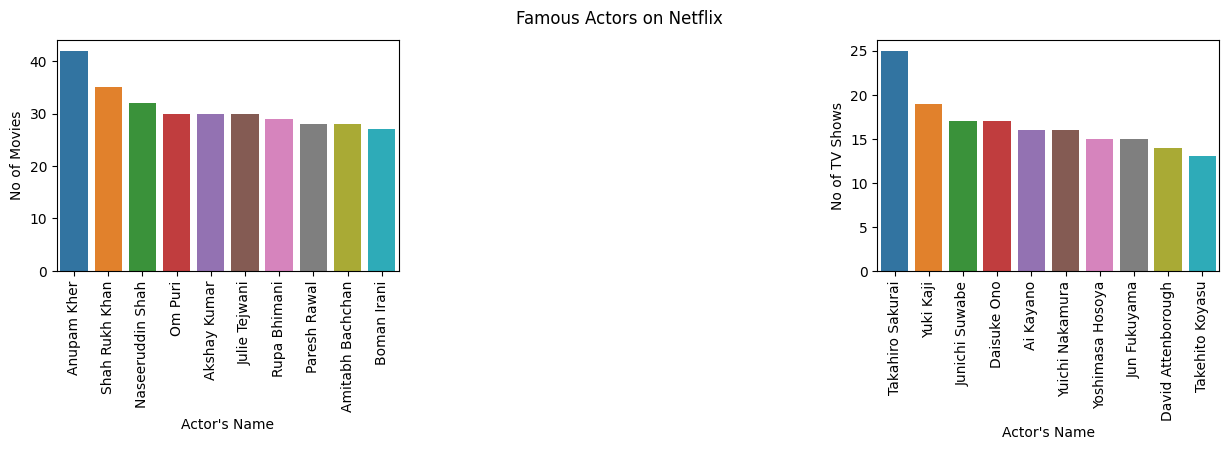

In [ ]:
# @title
plt.figure(figsize=(15,3))
plt.suptitle('Famous Actors on Netflix')

plt.subplot(1,3,1)
sns.barplot(famous_mv_cast,x="Actor's Name",y='No of Movies')
plt.xticks(rotation=90)

plt.subplot(1,3,3)
sns.barplot(famous_show_cast,x="Actor's Name",y='No of TV Shows')
plt.xticks(rotation=90)

plt.show()

- Anupam Kher is the famous actor who acted in 42 movies followed by Shahrukh Khan with 35 and Naseeruddin Shah with 32 movies.
- Takahiro Sakurai is the famous actor who acted in	25 TV Shows followed by
Yuki Kaji with 19 and Junichi Suwabe with 17 TV Shows.

In [ ]:
# @title Most productive Director
dir_prod = (netflix.groupby('director')['release_year'].max()-netflix.groupby('director')['release_year'].min()).reset_index()
dir_prod1=netflix.groupby('director')['title'].nunique().reset_index()
new_df=dir_prod.merge(dir_prod1,on='director',how='outer')
new_df['release_year']=new_df['release_year'].replace(0,1)
new_df['dir_prod']=new_df.title/new_df.release_year
prod_dir=new_df[new_df['director']!='unknown_dir'].sort_values(by='dir_prod',ascending=False).head(10)
prod_dir

,director,release_year,title,dir_prod
1905,Jan Suter,2,21,10.5
3798,Raúl Campos,2,19,9.5
2352,Justin G. Dyck,1,8,8.0
2923,Mark Thornton,1,7,7.0
4633,Todd Kauffman,1,7,7.0
2120,Joey So,1,6,6.0
188,Alex Woo,1,5,5.0
3785,Rathindran R Prasad,1,5,5.0
4362,Stanley Moore,1,5,5.0
1741,Hiroyuki Seshita,1,4,4.0


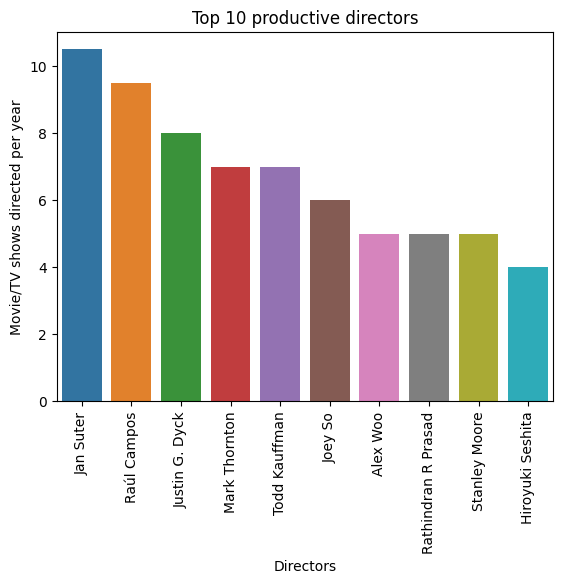

In [ ]:
# @title
sns.barplot(prod_dir,x='director',y='dir_prod')
plt.title("Top 10 productive directors")
plt.xlabel("Directors")
plt.xticks(rotation=90)
plt.ylabel('Movie/TV shows directed per year')
plt.show()

- The most productive director is Jan Suter	followed by Raúl Campos	and Justin G. Dyck.
- The least productive director is Brian De Palma followed by Stephen Chiodo and Sam Raimi.


# *Genre Analysis*

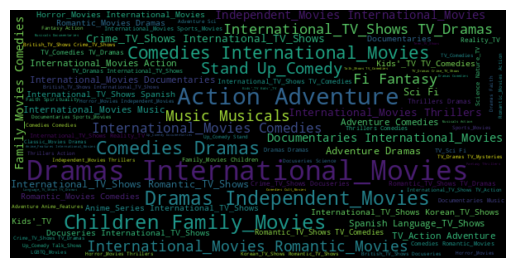

In [ ]:
# @title Famous Genre

netflix_df['genre']=[i.replace('&',",") for i in netflix_df['listed_in']]
data=netflix_df['genre'].str.split(",").explode().str.strip().reset_index()
data['genre']=[i.replace(" ","_") for i in data['genre']]
text=",".join(i for i in data['genre'])

word_count=WordCloud(width=600,height=300).generate(text)
plt.imshow(word_count,interpolation='bilinear')
plt.axis('off')
plt.show()

- The International movies are most famous on Netflix followed by the  dramas
- Genre which is least famous are cult_tv,classic etc

# *Analysis of release year and added year*

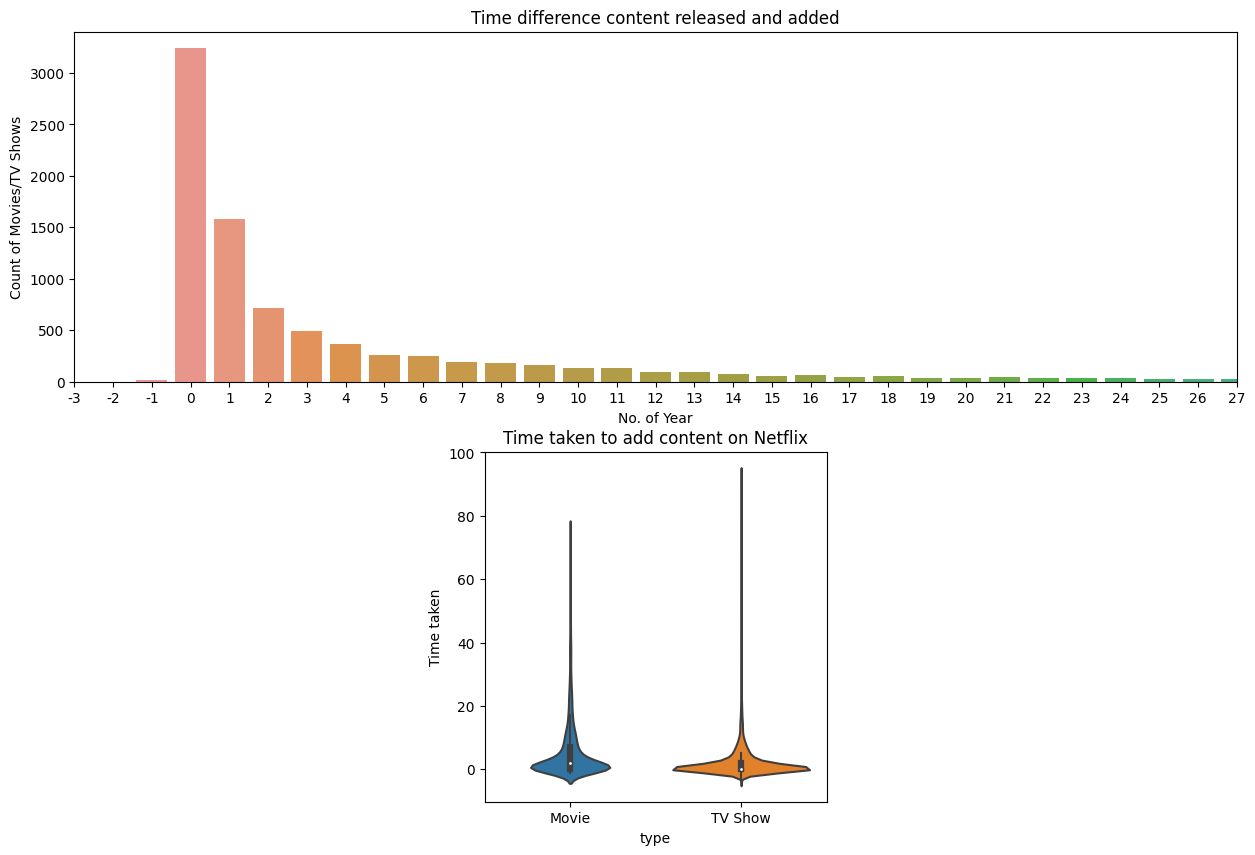

In [ ]:
# @title
netflix_df['year_added']=netflix_df['date_added'].dt.year
netflix_df['diff']=netflix_df['year_added']-netflix_df['release_year']
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.countplot(data=netflix_df,x='diff')
plt.xlabel("No. of Year")
plt.title("Time difference content released and added")
plt.ylabel("Count of Movies/TV Shows")
plt.xlim(0,30)

plt.subplot(2,3,5)
plt.title('Time taken to add content on Netflix')
sns.violinplot(data=netflix_df,x='type',y='diff')
plt.ylabel('Time taken')
plt.show()

- The content is generally added at the netflix within 1 year of its release
- Though movie added are taken from 1950s too the distribution has outliers too but for TV Shows they are mostly added within 1 year.
- 0 here denotes the time period within year.
- It is quite weird that the data frame has some points where release year is later than the added year due to which we are getting negative values for those data point.
- So it shows the data is not 100% accurate or have human errors.


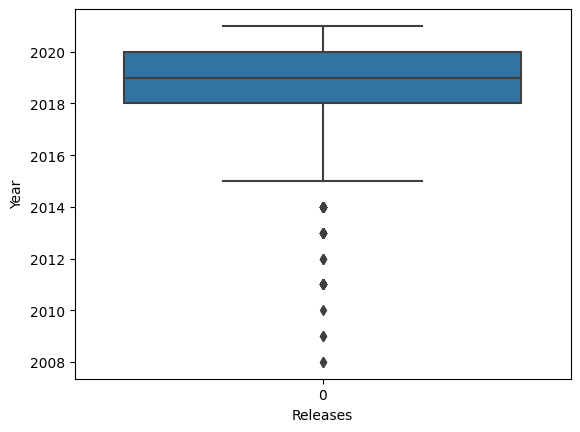

In [ ]:
# @title Content release year distribution
sns.boxplot(netflix_df['year_added'])
plt.ylabel("Year")
plt.xlabel("Releases")
plt.show()

As explained in earlier graph we can see there are outliers in older years because at that time less movies are added to netflix of that period but recently these movies are increased to many folds

# *Trend of content added over the years on Netflix*

In [ ]:
# @title

df1=netflix_df[['type','year_added']]
df2=df1.groupby(['year_added','type']).size().reset_index(name='Total Content')
df2=df2[df2['year_added']>=2010]
fig3 = px.line(df2, x="year_added", y="Total Content", color='type',title='Trend of content produced over the years on Netflix')
fig3.show()
df2

,year_added,type,Total Content
3,2010,Movie,1
4,2011,Movie,13
5,2012,Movie,3
6,2013,Movie,6
7,2013,TV Show,5
8,2014,Movie,19
9,2014,TV Show,5
10,2015,Movie,56
11,2015,TV Show,26
12,2016,Movie,251


With the time period netflix is adding more Movies than TV Shows

# *Trend of Movies and TV shows released in recent years*

In [ ]:
# @title
netflix_show1=netflix_show.groupby(['release_year','year_added'])['title'].nunique().reset_index()
netflix_movie1=netflix_movie.groupby(['release_year','year_added'])['title'].nunique().reset_index()

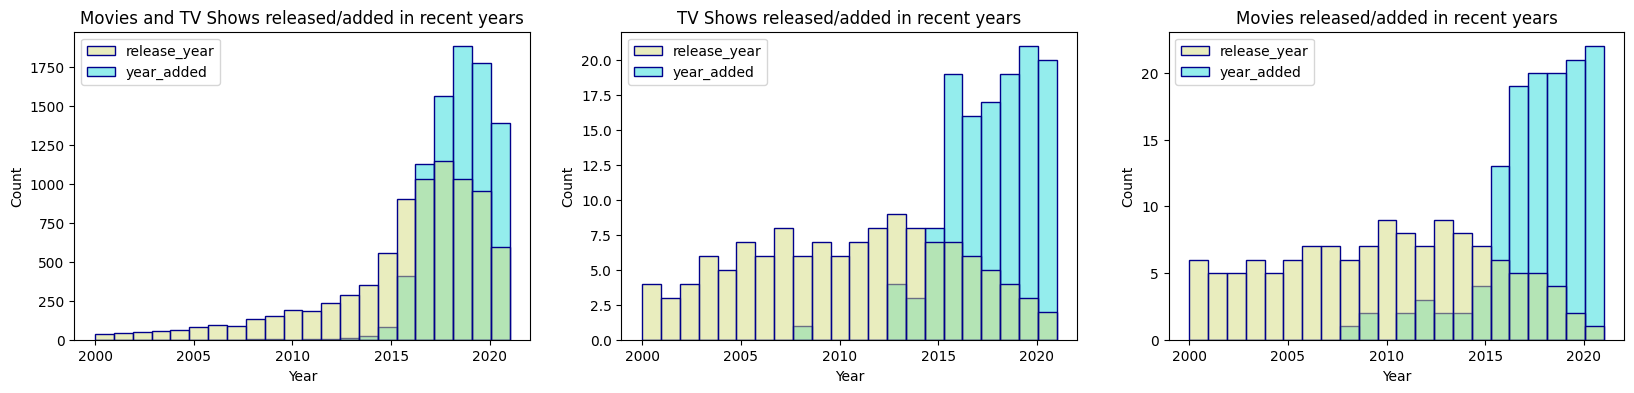

In [ ]:
# @title
plt.figure(figsize=(20,4))

plt.subplot(1,3,1)
sns.histplot(netflix_df[netflix_df['release_year']>=2000][['release_year','year_added']],bins=22,palette='rainbow_r', edgecolor='darkblue')
plt.xlabel('Year')
plt.title('Movies and TV Shows released/added in recent years')

plt.subplot(1,3,2)
sns.histplot(netflix_show1[netflix_show1['release_year']>=2000][['release_year','year_added']],bins=22,palette="rainbow_r",edgecolor='darkblue')
plt.title('TV Shows released/added in recent years')
plt.xlabel('Year')


plt.subplot(1,3,3)
sns.histplot(netflix_movie1[netflix_movie1['release_year']>=2000][['release_year','year_added']],bins=22,palette="rainbow_r",edgecolor='darkblue')
plt.title('Movies released/added in recent years')
plt.xlabel('Year')


plt.show()

- Movies added the most in 2019 which declined a bit in 2020 and about 2021 we cant say surely as data is available till september month while it may become more than 2020 as per current trend.
- Movies released were highest in 2018 which is slightly decreasing with the time.
- TV Shows got added the most in 2020 and about 2021 we cant say again but it may become more than 2020 as per current trend.
- TV Shows are released highest in 2019 and 2020 and hopefully will continue the trend in 2020 too.
- When we see the graph having both data we can see in 2019 the content is added the most and but the releasing of content is decreasing which is a concern.

# *Month by month analysis*

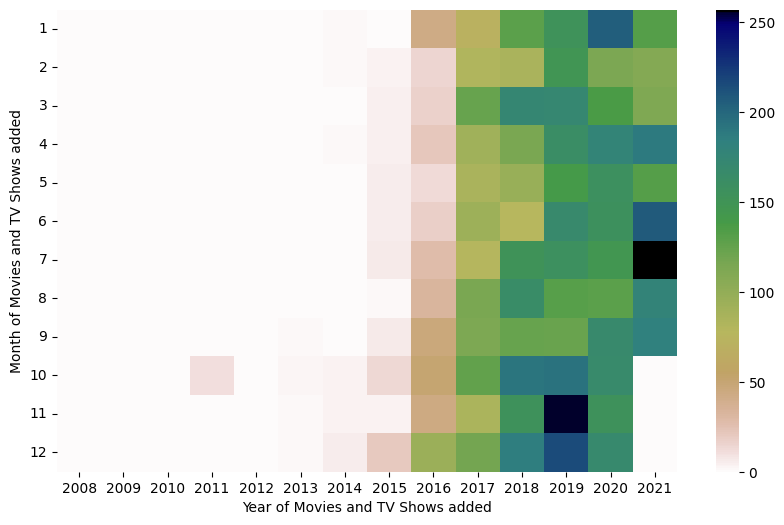

In [ ]:
# @title Added content analysis month by month
netflix_df.loc[:,'count']=1
netflix_pivot=netflix_df.pivot_table(columns='year_added', index='month_added', aggfunc='sum',values='count', fill_value=0)
plt.figure(figsize=(10,6))
sns.heatmap(netflix_pivot,cmap='gist_earth_r')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.ylabel('Month of Movies and TV Shows added')
plt.xlabel('Year of Movies and TV Shows added')
plt.show()

The most content is added in November 2019 and July 2021.
we cansee the content is generally least added in the February, march,May,August etc which will be the best months to add more content.

In [ ]:
# @title Deleting Useless Columns
netflix_df.drop(columns=['count','diff','genre'],inplace=True)

# *Genre wise Actor/Director Analysis*

In [ ]:
# @title
movie_cast=netflix_movie.groupby(['listed_in','cast'],group_keys=False)[['listed_in','cast']].value_counts().reset_index()
movie_cast.rename({0:'count'},axis=1,inplace=True)
movie_cast=movie_cast[movie_cast['cast']!='unknown_cast']
movie_cast=movie_cast.groupby(['listed_in'],group_keys=False).apply(lambda movie_cast:movie_cast[movie_cast['count']==movie_cast['count'].max()])
movie_cast=movie_cast.groupby(['listed_in'],group_keys=False).filter(lambda movie_cast:movie_cast['count'].max()>1)

movie_dir=netflix_movie.groupby(['listed_in','director'],group_keys=False)[['listed_in','director']].value_counts().reset_index()
movie_dir.rename({0:'count'},axis=1,inplace=True)
movie_dir=movie_dir[movie_dir['director']!='unknown_dir']
movie_dir=movie_dir.groupby(['listed_in'],group_keys=False).apply(lambda movie_dir:movie_dir[movie_dir['count']==movie_dir['count'].max()])
movie_dir=movie_dir.groupby(['listed_in'],group_keys=False).filter(lambda movie_dir:movie_dir['count'].max()>1)

show_cast=netflix_show.groupby(['listed_in','cast'],group_keys=False)[['listed_in','cast']].value_counts().reset_index()
show_cast.rename({0:'count'},axis=1,inplace=True)
show_cast=show_cast[show_cast['cast']!='unknown_cast']
show_cast=show_cast.groupby(['listed_in'],group_keys=False).apply(lambda show_cast:show_cast[show_cast['count']==show_cast['count'].max()])
show_cast=show_cast.groupby(['listed_in'],group_keys=False).filter(lambda show_cast:show_cast['count'].max()>1)

show_dir=netflix_show.groupby(['listed_in','director'],group_keys=False)[['listed_in','director']].value_counts().reset_index()
show_dir.rename({0:'count'},axis=1,inplace=True)
show_dir=show_dir[show_dir['director']!='unknown_dir']
show_dir=show_dir.groupby(['listed_in'],group_keys=False).apply(lambda show_dir:show_dir[show_dir['count']==show_dir['count'].max()])
show_dir=show_dir.groupby(['listed_in'],group_keys=False).filter(lambda show_dir:show_dir['count'].max()>1)

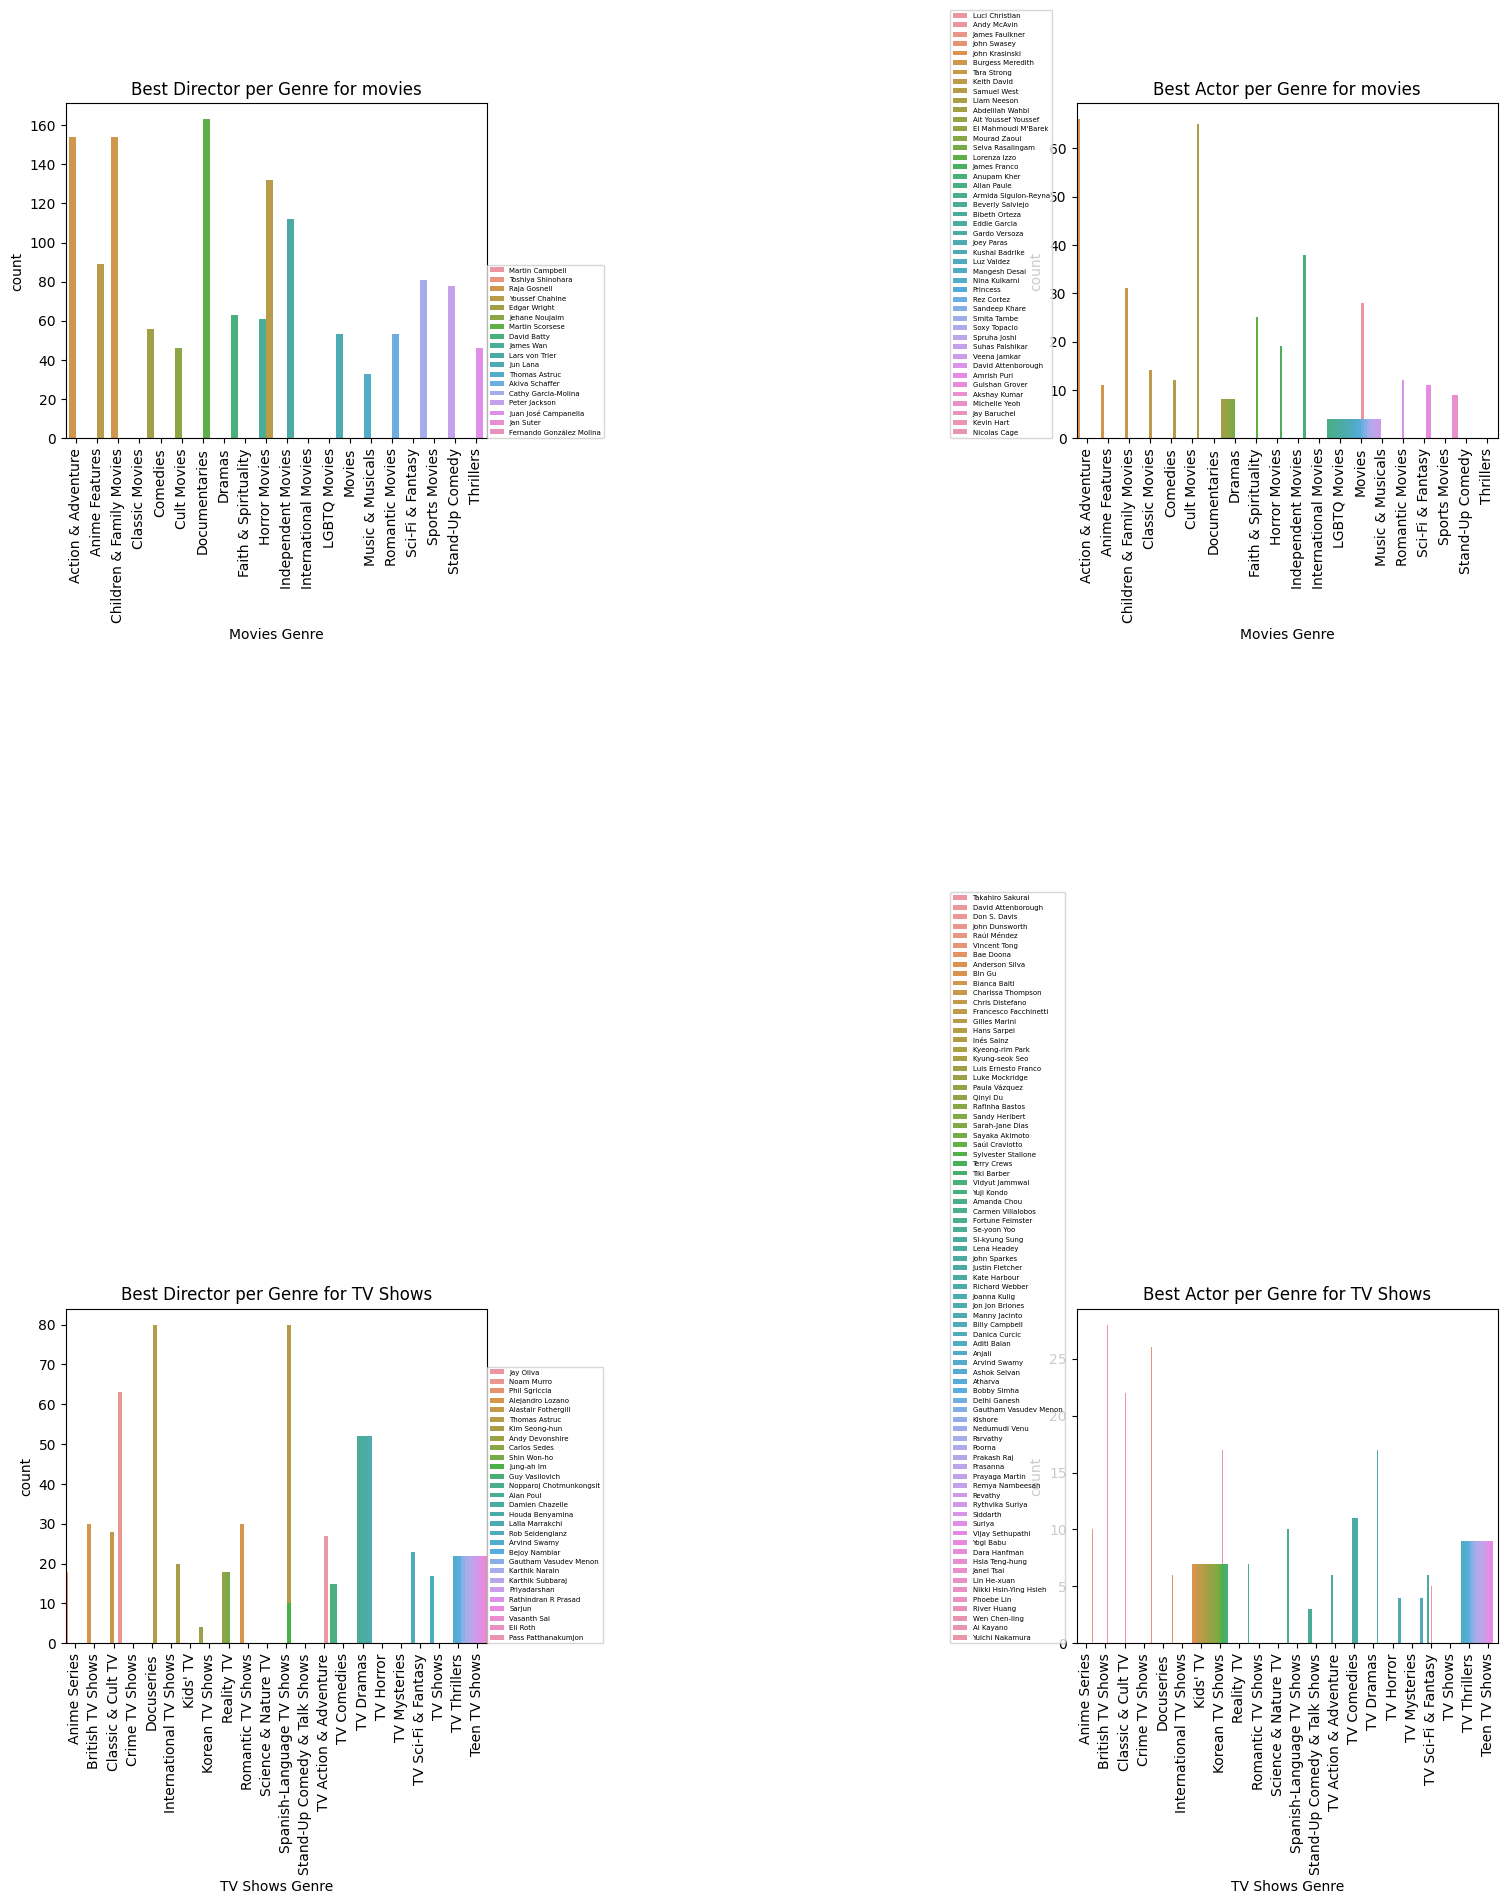

In [ ]:
# @title
plt.figure(figsize=(25,20))

plt.subplot(4,4,1)

ax=sns.barplot(data=movie_dir,x='listed_in',y='count',hue='director',width=6)
plt.title("Best Director per Genre for movies")
plt.xticks(rotation=90)
plt.xlabel("Movies Genre")
plt.legend(loc=(1,0),fontsize=5)

plt.subplot(4,4,3)
plt.title("Best Actor per Genre for movies")
sns.barplot(data=movie_cast,x='listed_in',y='count',hue='cast',width=6)
plt.xticks(rotation=90)
plt.xlabel("Movies Genre")

plt.legend(loc=(-.3,0),fontsize=5)

plt.subplot(4,4,13)
plt.title("Best Director per Genre for TV Shows")
sns.barplot(data=show_dir,x='listed_in',y='count',hue='director',width=6)
plt.xticks(rotation=90)
plt.xlabel("TV Shows Genre")

plt.legend(loc=(1,0),fontsize=5)

plt.subplot(4,4,15)
plt.title("Best Actor per Genre for TV Shows")
sns.barplot(data=show_cast,x='listed_in',y='count',hue='cast',width=6)
plt.xticks(rotation=90)
plt.xlabel("TV Shows Genre")

plt.legend(loc=(-.3,0),fontsize=5)
plt.show()

From the above graph we can infer every genre best director and actor, for example for Anime Series TV shows the best director is jay olivia and best actor is Takahiro Sakurai, for action and adventure best director is Martin Campbell while best actor is Luci Christian

# *Country vs Genre Analysis*

In [ ]:
# @title As it is difficult to show 123 countries filtering out countries who contributed atleast 20 movies in whole netflix business
country_genre=netflix[netflix['country']!='unknown_country']
country_genre=country_genre.groupby(['country','listed_in'])['title'].nunique().reset_index()
country_genre.rename(columns={'title':'count'},inplace=True)
country_genre=country_genre[country_genre['count']>20]

cnt_gen=pd.crosstab(columns=country_genre['listed_in'],index=country_genre['country'],values=country_genre['count'],aggfunc=sum)
cnt_gen=cnt_gen.sort_values('country',ascending=False)
cnt_gen.fillna(0,inplace=True)
cnt_gen[cnt_gen.sum(axis=1)>200]

listed_in,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic Movies,Comedies,Crime TV Shows,Cult Movies,Documentaries,...,Stand-Up Comedy & Talk Shows,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Thrillers,Teen TV Shows,Thrillers
country,,,,,,,,,,,,,,,,,,,,,
United States,404.0,0.0,0.0,24.0,390.0,81.0,680.0,145.0,52.0,512.0,...,33.0,93.0,253.0,232.0,37.0,51.0,59.0,27.0,33.0,292.0
United Kingdom,84.0,0.0,0.0,224.0,46.0,0.0,91.0,48.0,0.0,128.0,...,0.0,0.0,43.0,35.0,0.0,0.0,0.0,0.0,0.0,61.0
Turkey,0.0,0.0,0.0,0.0,0.0,0.0,58.0,0.0,0.0,0.0,...,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0
Spain,0.0,0.0,0.0,0.0,0.0,0.0,47.0,27.0,0.0,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0
South Korea,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,...,0.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,0.0,0.0
Mexico,0.0,0.0,0.0,0.0,0.0,0.0,24.0,32.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Japan,57.0,61.0,141.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0
India,142.0,0.0,0.0,0.0,43.0,0.0,325.0,0.0,0.0,27.0,...,0.0,0.0,26.0,28.0,0.0,0.0,0.0,0.0,0.0,95.0
Hong Kong,66.0,0.0,0.0,0.0,0.0,0.0,33.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


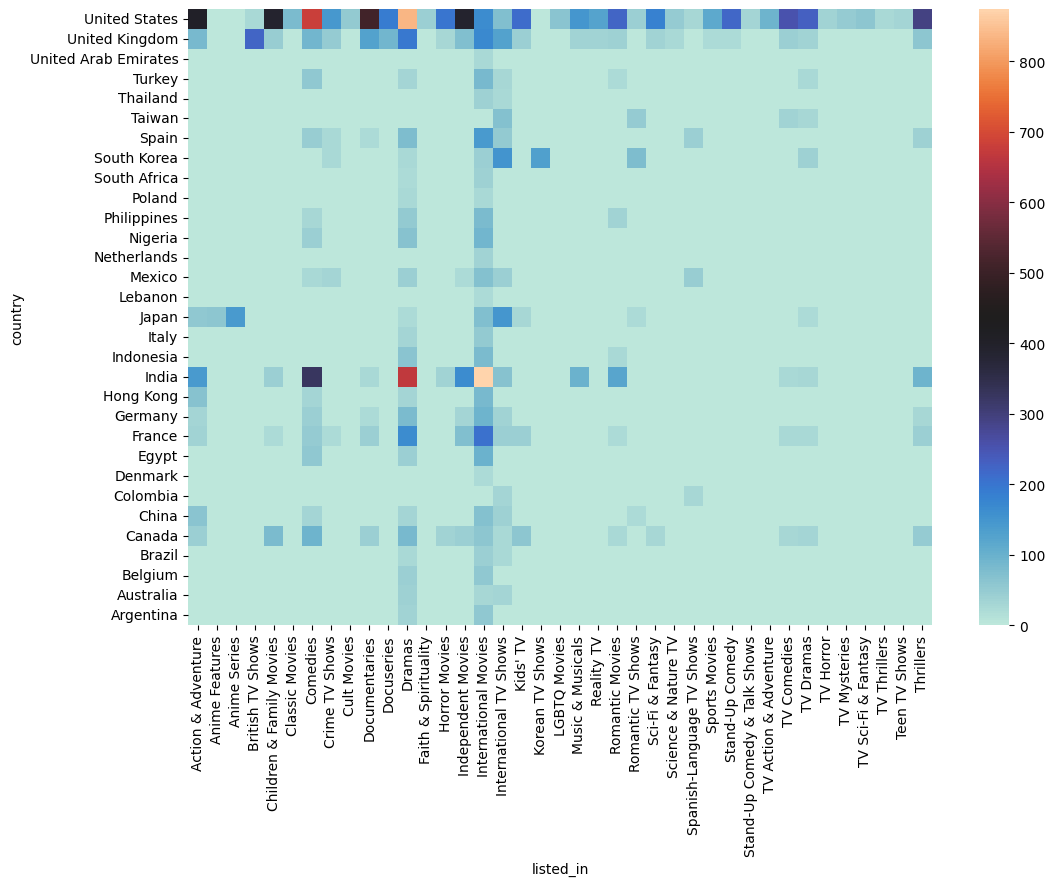

In [ ]:
# @title
plt.figure(figsize=(12,8))
ax=sns.heatmap(cnt_gen,cmap='icefire')

United States gave the most content in  dramas and comies while India contributed the most in dramas and International Movies

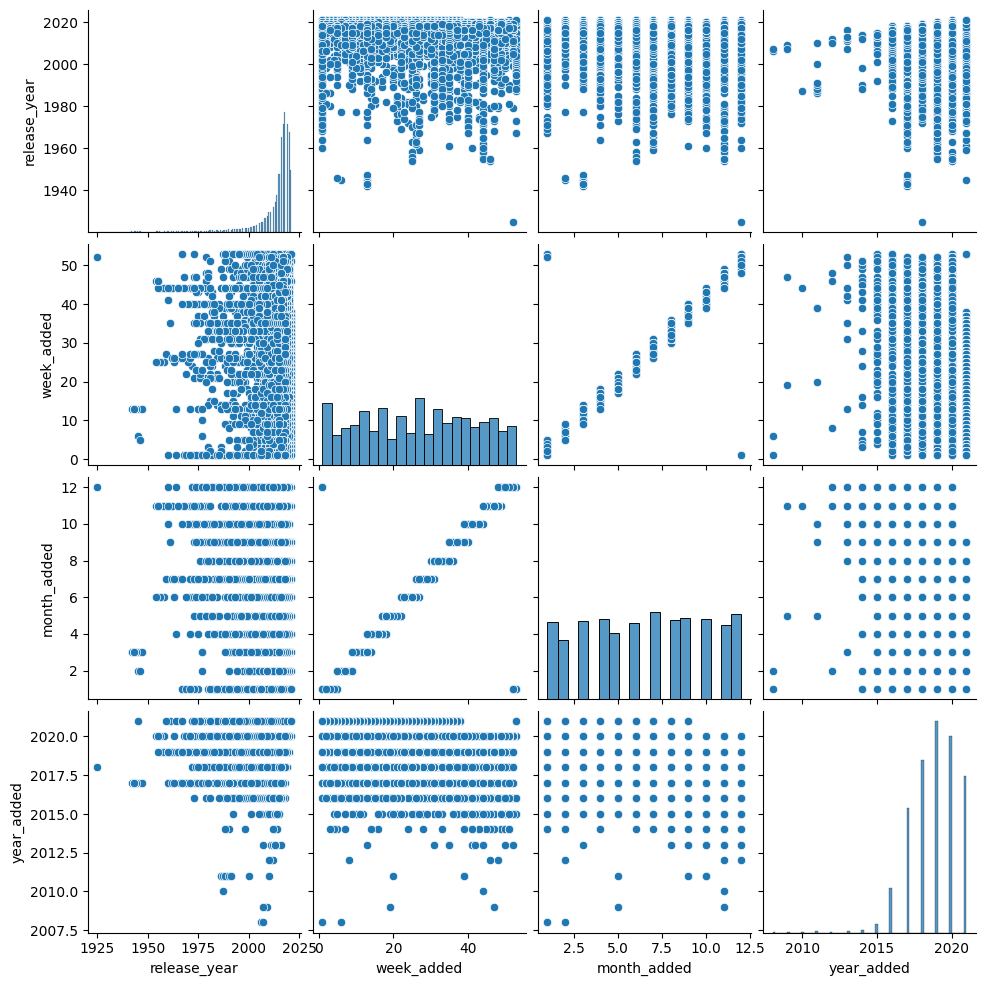

In [ ]:
# @title # *Pairplots*
sns.pairplot(netflix_df)

- There are content added in every month and week from 2015 to 2021 which was not so before so netflix is improving in business.
- Movies are getting released too in every month and every month too uniformly recently unlike befor 1990s.
- In every week there are almost same number of content added.
- More movies are releasing in the recent years.

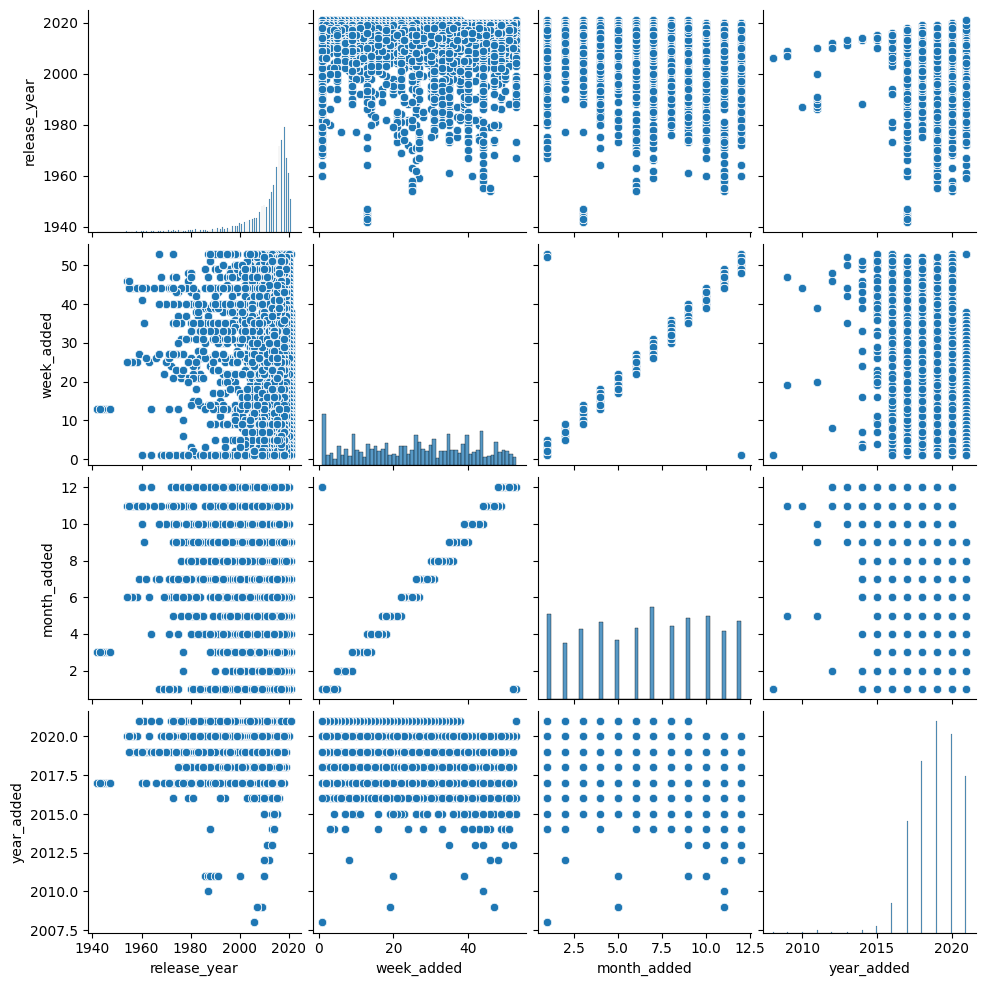

In [ ]:
# @title Movie data pairplots

sns.pairplot(netflix_movie)

- Movies are uniformly added in each year from various old years too.
- Same as in total content movies are getting added every month.
- in 2021, more movies are added per week.
- Movies are getting added most in December month.
- in the starting weeks,April ans September weeks older movies are getting added while in December and all more recent movies are getting added

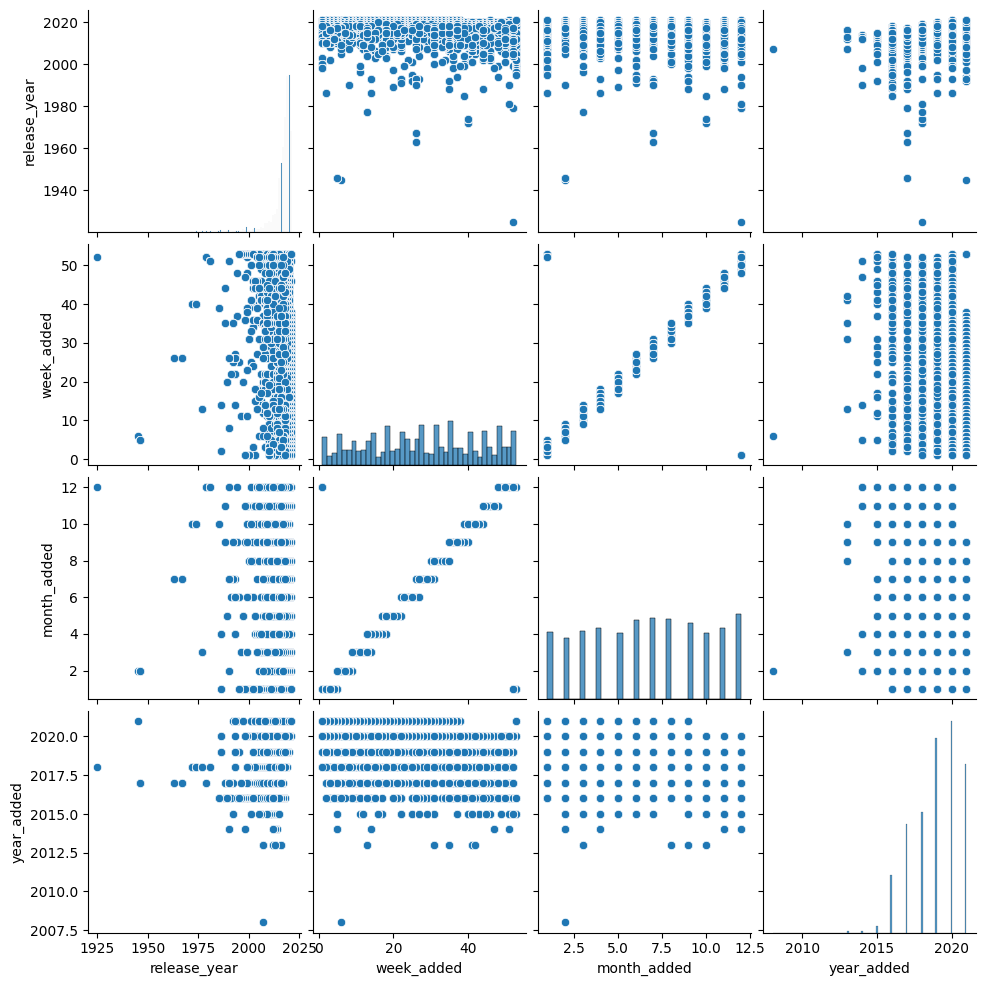

In [ ]:
# @title TV SHows data pairplot
sns.pairplot(netflix_show)

- Here too the  TV shows are getting added uniformly every month.
- There was not shows added before 2010 but with time they are gaining popularity.
- uptil 2015 Tv shows are not that much but in 2020 and 2021 their number is increasing.
- Tv shows are not even released before 2013 so much so not added obviously
- With the time each week more shows are getting added.

# *Insights*

- Though I have written the insights with each analysis lets summarize them together
- The oldest available movie on netflix is from year 2015 and the newest one is from 2021.
- TV shows are only 30% of movies available here.
- Most movies are added in 2019 and TV Shows in 2019 and 2020.
- the total content addition was improving every year but the curve deciled in 2020 whoch is not a good sign and Netflix have to buckle up its business.
- The content is getting added the most in the last month of Year but in july 2021, the content added is maximum of all time, so its a good sign which shows netflix working effeciently to upside down the 2020 decline.
- United States,United Kingdom,India nd Japan are most content providing countries for Netflix.
- Rajiv Chilaka is the most famous movies director and 	Alastair Fothergill, the most famous TV shows director on netflix.
- Anupam Kher is the most famous movie actor and Takahiro Sakurai	is the most famous TV Show actor on Netflix.
- Jon sute,Raul Compas are the most productive directors.
- 1 season TV show and 90 min duration movies are most likeable.
- The more the duration of movie the less it is being watched.
- More the number of season of Tv shows it is likely to be less liked by people.
- International Movies and Dramas are most likely genres while the classic and cult_tv are least liked.
- TV MA and TV 14 ratings content are available the most but the NC 17 and UR ratings content are least available.
- The difference between the release and added year is almost same, which means generally most of the content is getting added on netflix on the same year.
- From 2008 to 2019, there has been a significant increase in the number of movies released.
- Highest releases are observed in the year 2019 followed by 2020 and 2021.
- Lowest releases are observed in the year 2008 followed by 2010 and 2012.


# *Recommendations*
- It has been seen that the content addition is declining in the recent years which shpuld be increased.
- The movies releasing in recent years are also not increasing much which may be the area of concern so netflix should start sponsoring its own production for movies and TV shows.
- It must pick the most famous actor like Anupam Kher,Shahrukh Khan and most famous director like Rajiv Chilka,Jan Suter for movies as most productive director and Alastair Fothergill for TV shows as director and Takahiro Sakurai,Yuki Kaji	 as the actor.
- It must focus on creating international movies and dramas with TV 14 and TV ma rating as these are liked mostly by people, but should also add content based on other age group preferences to increase its consumer base.
- It should add more content on the platform during the February,May and June months when there are least content is getting added.
- For the month of July,December when there is too much content added, it should ensure proper launch and marketing.
- Although the movies are added within a year, the time difference should be decreased and content should be made available as soon as possible.
- The content should be made available in various different languages,ethinics and culture as the customer base of Netflix must be worldwide.
- It should focus on adding content from those countries too which are left out as this will make that countries people come on netflix too and take its services.
- Identify countries with untapped potential for content production like Lithuania,Nigeria etc. as investing in emerging markets can lead to new and diverse content offerings.
- It should add exclusive movies or tv shows that will be released on netflix only to enhance the platform's appeal.
-  Netflix should have contracts with the movie and Tv show producers to not to show their content on platforms other than Netflix to defeat their competitors.
- It should have some censor in itself which will check the content to be added before to keep the quality approach.
- Today is the era of environmentalists and liberalism. So netflix should also do some social tasks to have goodwill and increase its branding.  
- More discounts and offers can be given to join consumers in the beginning, and loyality points and discounts to make them stay for always.
- Netflix is improving its business regularly with some downslope of content addition in 2020 which can be reverse by working on the recommendations.